# Primer caso: Dimerización con degradación de Dímero

## Ecuaciones químicas

## Ecuaciones diferenciales

$$\frac{dmRNA}{dt}= \alpha + kS p_{tot} - \delta_2 mRNA$$
$$\frac{dA}{dt}= k_2 mRNA - k_{dim}A^2 + 2k_{undim}AA- \delta A$$
$$\frac{dAA}{dt}= 0.5k_{dim}A^2 - k_{undim}AA- \delta_3 AA$$

Considerando que el caso anterior puede reducirse a dos ecuaciones y suponiendo que la formación de AA alcanza el equilibrio dinámico rápidamente.

$$\bar{AA}=\frac{k_{dim}A^2}{k_{undim}+\delta_3}$$

Entonces, el sistema queda de la siguiente manera:

$$\frac{dmRNA}{dt}= \alpha + kS p_{tot} - \delta_2 mRNA$$
$$\frac{dA}{dt}= k_2 mRNA - 2k_{dim}A^2 + 2 k_{undim}\frac{k_{dim}A^2}{k_{undim}+\delta_3}- \delta A$$
$$\frac{dA}{dt}= k_2 mRNA - 2k_{dim}A^2(1 - \frac{k_{undim}}{k_{undim}+\delta_3})- \delta A$$

### Para analizar estados estacionarios:

Ya conocemos el de AA. El de mRNA es, de igual manera, fácil de obtener: $$\bar{mRNA}=\frac{a+kS}{\delta_2}$$ Pero, dado que la ecuación de A tiene dos posibles raíces, se calculan dos casos.

In [1]:
from sympy.solvers import solve

In [2]:
import math

In [3]:
from sympy.abc import x, f, b, d

In [4]:
solve([f-(b*(x**2))-d*x],x)

[(-d/(2*b) - sqrt(4*b*f + d**2)/(2*b),),
 (-d/(2*b) + sqrt(4*b*f + d**2)/(2*b),)]

Donde:

$$f=k_2 \bar{mRNA}, b=2 kdim \left(1 - \frac{k_{undim}}{k_{undim}+\delta_3}\right), d=\delta$$ y $$x=A$$

Para poner todo en un mismo tiempo, se puede normalizar por $\delta$ de la siguiente manera:

$$\frac{dmRNA}{d\tau}= \frac{\alpha}{\delta} + \frac{kS p_{tot}}{\delta} - \frac{\delta_2 mRNA}{\delta}$$

$$\frac{dA}{d\tau}= \frac{k_2 mRNA}{\delta} - \frac{2k_{dim}A^2}{\delta}(1 - \frac{k_{undim}}{(k_{undim}+\delta_3})- A$$

In [5]:
0.01*((6.022*(10.0**23)*(42.0*(10.0**(-15)))))

252924000.0

Establecemos los parámetros

In [6]:
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=0.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3;d4=d3;k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5; ptot2=300;

In [7]:
mRNAs=(a+(k*S))/d2; c= kundim /(kundim + d3); be=2*kdim*(1-c); F=k2*mRNAs;m=(-d/(2.0*(be)))+((math.sqrt((4.0*be*F)+(d**2))/(2.0*be))); Astat=m

In [8]:
mRNAs

0.16666666666666669

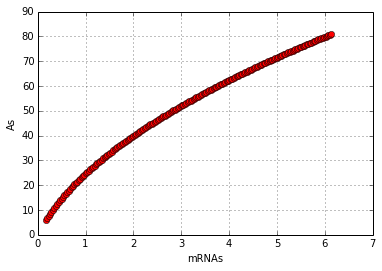

In [9]:

SArr=[0]*200
mRNArr=[0]*200
mArr=[0]*200
for x in range(0,200):
    SArr[x]=x
    mRNArr[x]=(a+(k*SArr[x]))/d2
    Ftemp=k2*mRNArr[x]
    mArr[x]=(-d/(2.0*(be)))+((math.sqrt((4.0*be*Ftemp)+(d**2))/(2.0*be)))    
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
plt.plot(mRNArr,mArr, 'ro')
xlabel('mRNAs')
ylabel('As')
grid('on')
show()

Bajo este mecanismo, por cada valor de S, hay un valor real de $\bar{A}$ y $\bar{mRNA}$ 

### Para el potencial veáse cuaderno de mathematica.

### Para simular en caso "Normal" (sin normalizar con $\delta$)

In [10]:
import numpy as np

In [11]:
from scipy.integrate import odeint

In [12]:
t=np.arange(0,1440,0.01)

In [13]:
xo = [0, 0]

In [14]:
a

0.01

In [15]:
def f_1(x,t): 
    return (((k2*x[1])-(be*(x[0]**2))-d*x[0]),((a+(k*S)-d2*x[1])))

In [16]:
soln=odeint(f_1,xo,t)

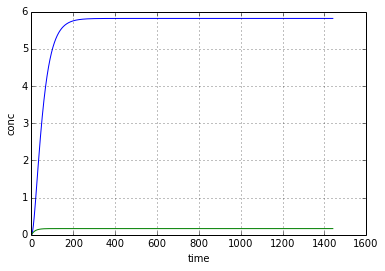

In [17]:
from pylab import *
plot(t,soln)
xlabel('time')
ylabel('conc')
grid('on')
show()

#### Cambiando A de variable a $\hat{A}$

Cambiando de variable a $\hat{A}$, donde: $$\hat{A}=\frac{A}{\bar{A}}$$

Esto quedaría, después de normalizar el tiempo a $\tau$ como:

$$\frac{dmRNA}{d\tau}= \frac{\alpha}{\delta} + \frac{kS p_{tot}}{\delta} - \frac{\delta_2 mRNA}{\delta}$$

$$\frac{d\hat{A}}{d\tau}= \frac{k_2 mRNA}{\delta \bar{A}} - \frac{2k_{dim}\bar{A}\hat{A}^2}{\delta}(1 - \frac{k_{undim}}{(k_{undim}+\delta_3})- \hat{A}$$

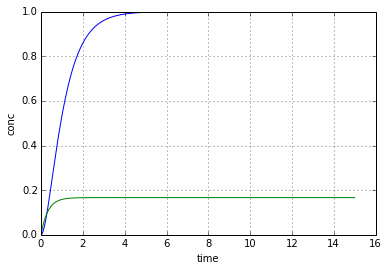

In [18]:
def f_a(x,t): 
    return (((k2*x[1]/(d*m))-(be*m*(x[0]**2)/d)-x[0]),((a+(k*S)-d2*x[1]))/d)
t=np.arange(0,15,0.01)
soln=odeint(f_a,xo,t)
from pylab import *
plot(t,soln)
xlabel('time')
ylabel('conc')
grid('on')
show()

### Suponiendo que no sé del acoplamiento de AA con A, si normalizo: 

$$\frac{dA}{d\tau}= \frac{k_2 mRNA}{\delta \bar{A}} - 2k_{dim} \delta \bar{A} A^2 + \frac{2 k_{undim} AA}{\delta \bar{A}} - A$$

$$\frac{dmRNA}{d\tau}= \frac{\alpha}{\delta} + \frac{kS p_{tot}}{\delta} - \frac{\delta_2 mRNA}{\delta}$$

$$\frac{dAA}{d\tau}= \frac{k_{dim}A^2 - k_{undim}AA- \delta_3 AA}{\delta}$$


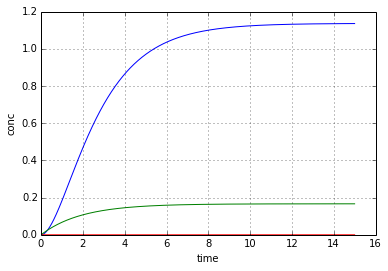

In [19]:
xo=[0, 0, 0]
def f_a(x,t): 
    return ((((k2*x[1])/(d*m))-2*kdim*d*m*(x[0]**2)+((2*kundim*x[2])/(m*d))-x[0]),
            (a+(k*S)-d2*x[1])/(m*d),
            (kdim*(x[0]**2)*m*d)+(-kundim*x[2]-d3*x[2])/d)
t=np.arange(0,15,0.01)
soln=odeint(f_a,xo,t)
from pylab import *
plot(t,soln)
xlabel('time')
ylabel('conc')
grid('on')
show()

Por lo tanto, falsear los acoplamientos no funciona (no se vuelve a alcanzar uno). En este punto eso no importa, pero el acoplamiento se hace más intrincado cuando hay retroacción y esto no puede aplicarse fácilmente.

#### Segunda normalizacion

Para hacer mas comparables todos los casos normalizamos por el estado estacionario del segundo caso (mas simple) en lugar del propio.

Con:

$$\bar{A_2}=\frac{k_2 \frac{\alpha+kS}{\delta_2}}{\delta}$$


$$\frac{dmRNA}{d\tau}= \frac{\alpha}{\delta} + \frac{kS p_{tot}}{\delta} - \frac{\delta_2 mRNA}{\delta}$$

$$\frac{d\hat{A}}{d\tau}= \frac{k_2 mRNA}{\delta \bar{A_2}} - \frac{2k_{dim}\bar{A_2}\hat{A}^2}{\delta}(1 - \frac{k_{undim}}{(k_{undim}+\delta_3})- \hat{A}$$

In [20]:
#m/m2

In [21]:
#mR=(a+(k*S))/d2
#m2=k2*mR/d
#xo=[0, 0]
#def f_a2(x,t): 
#    return (((k2*x[1]/(d*m2))-(be*m2*(x[0]**2)/d)-x[0]),((a+(k*S)-d2*x[1]))/d)
#t=np.arange(0,150,0.01)
#soln=odeint(f_a2,xo,t)
#from pylab import *
#plot(t,soln)
#xlabel('time')
#ylabel('conc')
#grid('on')
#show()

## Con retroacción (Sin degradación de C1):

### Ecuaciones diferenciales:

$$\frac{dA}{dt}= k_2 mRNA - k_{dim}A^2 + 2k_{undim}AA- \delta A$$

$$\frac{dmRNA}{dt}= \alpha + kS p_{tot} - \delta_2 mRNA$$

$$\frac{dAA}{dt}= 0.5k_{dim}A^2 - k_{undim}AA + k_{off} C_1 - (p_{tot2} - C_1) AA k_{on}-d_3 AA $$

$$\frac{dC_1}{dt}= (p_{tot2} - C_1) k_{on} AA - k_{off} C_1 $$

Si el complejo $C_1$ alcanza rápidamente el equilibrio:

$$\bar{C_1}=\frac{p_{tot2}k_{on}AA}{k_{on}AA+k_{off}}$$

#### Simulando el sistema sin modificar:

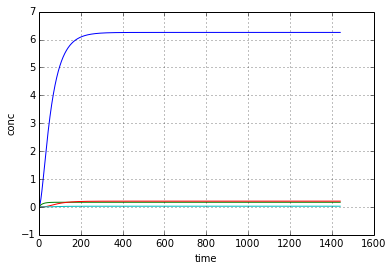

In [22]:
ptot2=300
S=0
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
def f_a(x,t): 
    return (((k2*x[1])-(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))/2-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon))
xo = [0, 0, 0, 0]
t=np.arange(0,1440,0.01)
soln2=odeint(f_a,xo,t)
from pylab import *
plot(t,soln2)

xlabel('time')
ylabel('conc')
grid('on')
show()

Modificando sólo la ptot

/Users/liberPH/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


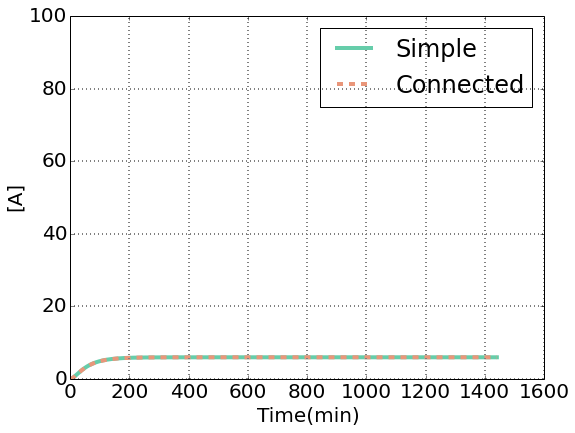

In [23]:
import numpy, pylab
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon))
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0], "--",color = '#e9967a',lw=4)
xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
#fig.savefig('one_S_0_deg.eps',format="eps")
show()

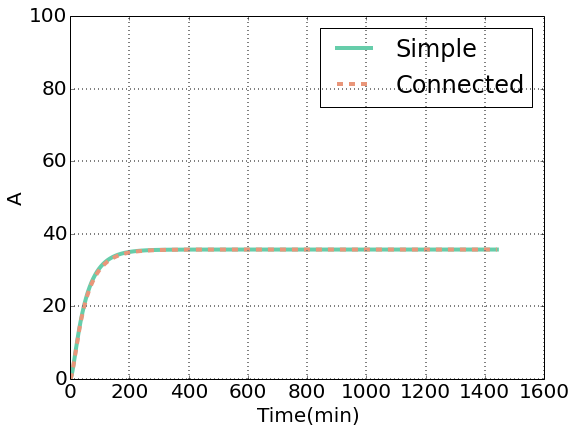

In [24]:
import numpy
S=50
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon))
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('A')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
#fig.savefig('one_S_50_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


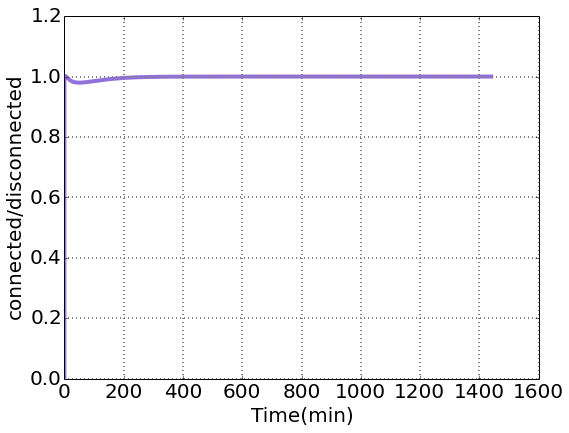

In [25]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=soln5[:,0]/soln4[:,0]
cosa[0]=0
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('one_00_S_50_deg_ratio.eps',format="eps")
show()

# Modificando kon

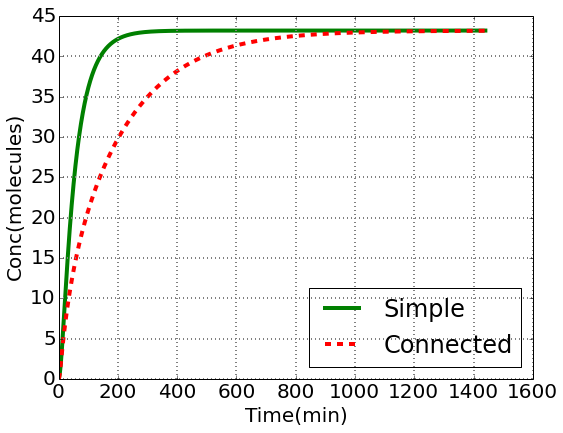

In [26]:
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=300; kon2=kon*100;
def f4(x,t): 
    return (((k2*x[1])-(kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]**2)/2-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon))
def f4R(x,t): 
    return (((k2*x[1])-(kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),((a+(k*S)-d2*x[1])),(kdim*(x[0]**2)/2-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon2-d3*x[2]),(-koff*x[3]+(ptot2-x[3])*x[2]*kon2))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0],'g',lw=4)
p2, =plot(t,soln5[:,0],'r--',lw=4)
legend([p1, p2], ["Simple", "Connected"],loc=4)
xlabel('Time(min)')
ylabel('Conc(molecules)')
grid('on',lw="2", color="gray")
show()

# Con S=50 sin modificar  kon

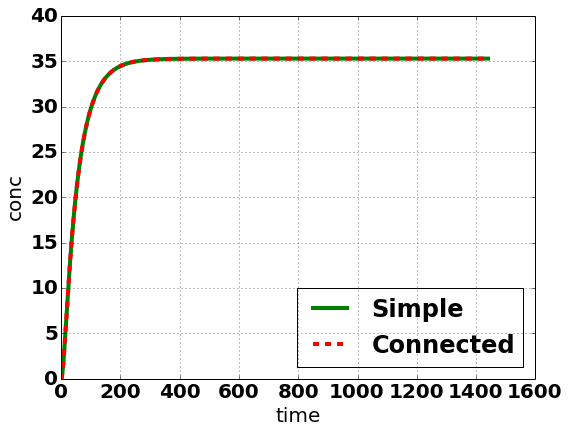

In [27]:
d4=0.06; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=300; kon2=kon;
S=50
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]**2)-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon))
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]**2)-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon2-d3*x[2]),(-koff*x[3]+(ptot2-x[3])*x[2]*kon2))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0],'g',lw=4)
p2, =plot(t,soln5[:,0],'r--',lw=4)
legend([p1, p2], ["Simple", "Connected"],loc=4)
xlabel('time')
ylabel('conc')
grid('on')
show()

# Con S=50 y modificando kon

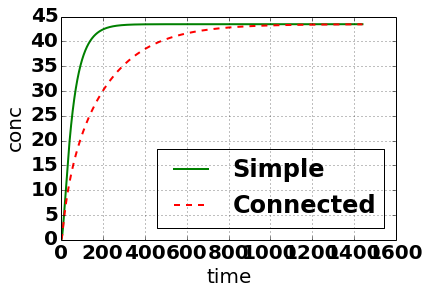

In [28]:
d4=0.06; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=300; kon2=kon*100; S=50;
def f4(x,t): 
    return (((k2*x[1])-(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            kdim*(x[0]*(x[0]-1))/2-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2],
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon))
def f4R(x,t): 
    return (((k2*x[1])-(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            kdim*(x[0]*(x[0]-1))/2-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon2-d3*x[2],
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon2))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
p1, =plot(t,soln4[:,0],'g',lw=2)
p2, =plot(t,soln5[:,0],'r--',lw=2)
legend([p1, p2], ["Simple", "Connected"],loc=4)
xlabel('time')
ylabel('conc')
grid('on')
show()

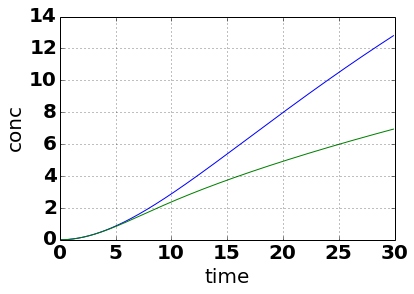

In [29]:
d4=0.2; xo = [0, 0, 0, 0]; t=np.arange(0,30,0.1); ptot2=300; kon2=kon*100; S=50;a=0.01;
def f4(x,t): 
    return (((k2*x[1])-(2*kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),((a+(k*S)-d2*x[1])),(kdim*(x[0]**2)-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),(-koff*x[3]+(ptot2-x[3])*x[2]*kon))
def f4R(x,t): 
    return (((k2*x[1])-(2*kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),((a+(k*S)-d2*x[1])),(kdim*(x[0]**2)-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon2-d3*x[2]),(-koff*x[3]+(ptot2-x[3])*x[2]*kon2))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
cosa=numpy.vstack((soln4[:,0],soln5[:,0])).T
plot(t,cosa)
xlabel('time')
ylabel('conc')
grid('on')
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


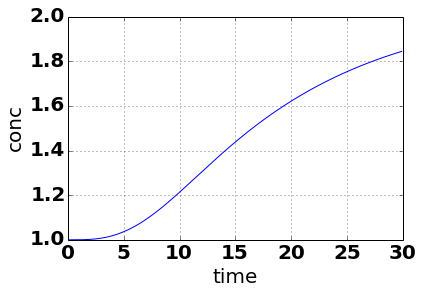

In [30]:
cosa=soln4[:,0]/soln5[:,0];
cosa[0]=0
plot(t,cosa)
import pylab
pylab.ylim([1,2])
xlabel('time')
ylabel('conc')
grid('on')
show()

El estado estacionario de AA no cambia, por lo que podriamos simular de la misma manera que cuando el sistema esta desconectado, ya que la falta de degradacion parece hacer el cambio negligible. 

Simulaciones variando parámetros. Lo más importante es poder variar la relación entre d3 y koff.

Al sustituir vuelve a ser fácil eliminar todos los términos de C_1 y AA, por lo que se tienen los mismos estados estacionarios que para el caso anterior. Si, a pesar d elo anterior, quisieramos evaluar sus diferencias con el caso desconectado, podemos simular con una normalización similar. (revisar normalización, no está quedando bien...)

La normalizacion seria algo como:

$$\frac{dA}{dt}= \frac{k_2 mRNA}{\delta m} - 2k_{dim} m \delta \hat{A}^2 + \frac{2k_{undim}AA}{\delta m}- \hat{A}$$

$$\frac{dmRNA}{dt}= \frac{\alpha + kS p_{tot} - \delta_2 mRNA}{\delta}$$

$$\frac{dAA}{dt}= \frac{k_{dim}A^2 - k_{undim}AA + k_{off} C_1 - (p_{tot2} - C_1) AA k_{on}-d_3 AA}{\delta} $$

$$\frac{dC_1}{dt}= \frac{(p_{tot2} - C_1) k_{on} AA - k_{off} C_1}{\delta} $$

Donde m puede ser el actual o anterior estado estacionario.


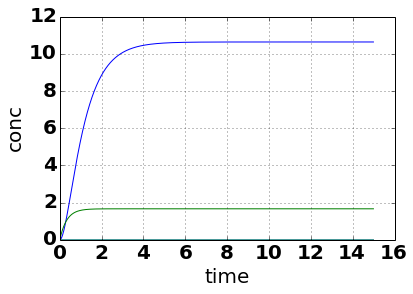

In [31]:
d=0.02
def f_a(x,t): 
    return (((k2*x[1])/(d*m)-(2*kdim*(x[0]**2)*m*d)+(2*kundim*x[2])/(m*d)-x[0]),((a+(k*S)-d2*x[1]))/d,kdim*m*(d)*(x[0]**2)-(kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2])/d,(-koff*x[3]+(ptot2-x[3])*x[2]*kon)/d)
xo = [0, 0, 0, 0]
t=np.arange(0,15,0.01)
soln2=odeint(f_a,xo,t)
plot(t,soln2)
xlabel('time')
ylabel('conc')
grid('on')
show()

No parece estar quedando bien esta normalizacion

## Con retroacción (Con degradación de C1):

### Ecuaciones diferenciales:

$$\frac{dA}{dt}= k_2 mRNA - 2k_{dim}A^2 + 2k_{undim}AA- \delta A$$

$$\frac{dmRNA}{dt}= \alpha + kS p_{tot} - \delta_2 mRNA$$

$$\frac{dAA}{dt}= k_{dim}A^2 - k_{undim}AA + k_{off} C_1 - (p_{tot2} - C_1) AA k_{on}-d_3 AA $$

$$\frac{dC_1}{dt}= (p_{tot2} - C_1) k_{on} AA - k_{off} C_1 - \delta_4 C_1$$

Si el complejo $C_1$ alcanza rápidamente el equilibrio:

$$\bar{C_1}=\frac{p_{tot2}k_{on}AA}{k_{on}AA+k_{off}+\delta_4}$$

$$\bar{AA}=\frac{k_{dim}A^2 + k_{off}C_1}{k_{undim}+(p_{tot2}-C_1)k_{on}+\delta_3 AA}$$

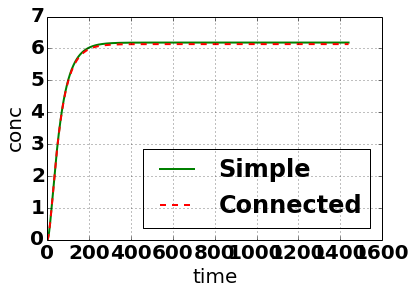

In [32]:
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=0.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3;d4=d3;k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5; ptot2=300;kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60

xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=300; kon2=kon;ptot=0;
def f4(x,t): 
    return (((k2*x[1])-(kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]**2)/2-kundim*x[2]+koff*x[3]-(ptot-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-(kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]**2)/2-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon2-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon2)-d4*x[3])
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)

p1, =plot(t,soln4[:,0],'g',lw=2)
p2, =plot(t,soln5[:,0],'r--',lw=2)
legend([p1, p2], ["Simple", "Connected"],loc=4)
xlabel('time')
ylabel('conc')
grid('on')
show()

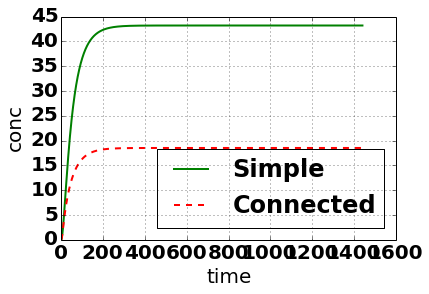

In [33]:
S=50
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=300; kon2=kon*100;
def f4(x,t): 
    return (((k2*x[1])-(kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]**2)/2-kundim*x[2]+koff*x[3]-(ptot-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-(kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]**2)/2-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon2-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon2)-d4*x[3])
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)


p1, =plot(t,soln4[:,0],'g',lw=2)
p2, =plot(t,soln5[:,0],'r--',lw=2)
legend([p1, p2], ["Simple", "Connected"],loc=4)
xlabel('time')
ylabel('conc')
grid('on')
show()

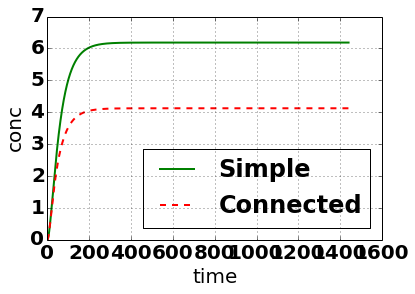

In [34]:
S=0
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=300; kon2=kon*100;
def f4(x,t): 
    return (((k2*x[1])-(kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]**2)/2-kundim*x[2]+koff*x[3]-(ptot-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-(kdim*(x[0]**2))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]**2)/2-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon2-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon2)-d4*x[3])
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)


p1, =plot(t,soln4[:,0],'g',lw=2)
p2, =plot(t,soln5[:,0],'r--',lw=2)
legend([p1, p2], ["Simple", "Connected"],loc=4)
xlabel('time')
ylabel('conc')
grid('on')
show()

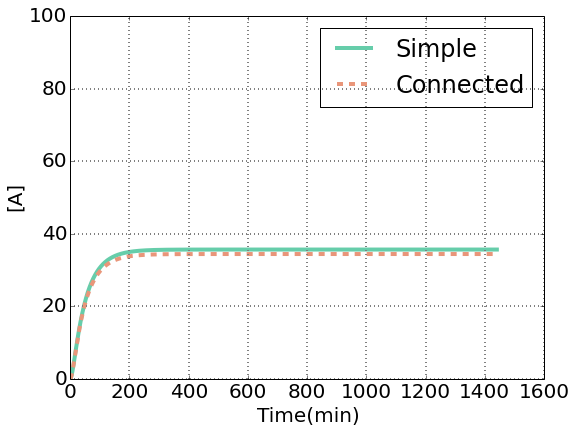

In [35]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=d
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
#fig.savefig('one_S_50_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


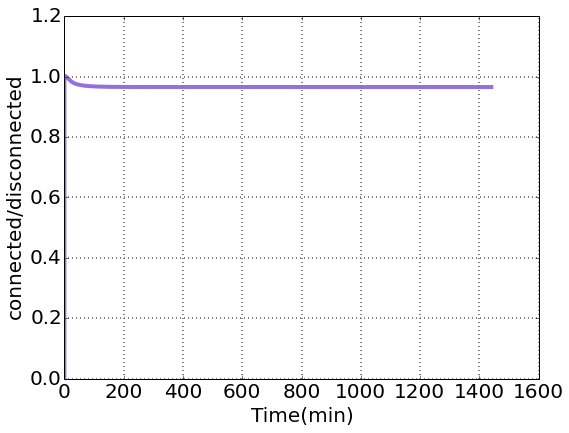

In [36]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=soln5[:,0]/soln4[:,0]
cosa[0]=0
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('one_00_S_50_deg_ratio.eps',format="eps")
show()

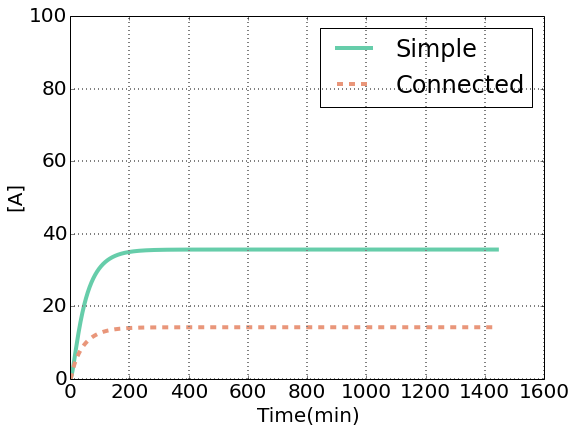

In [37]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=100*kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
#fig.savefig('one_S_50_100kon_deg.eps',format="eps")
show()

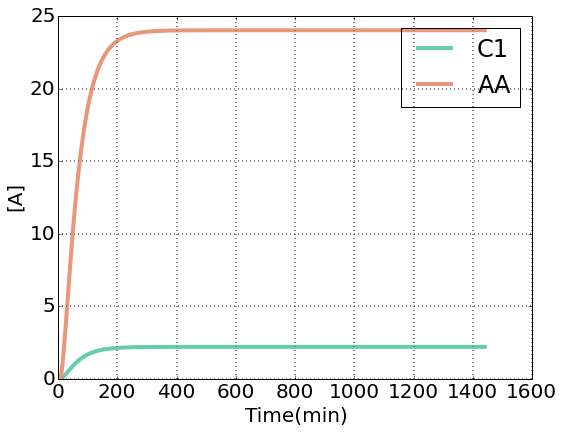

In [38]:
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,25])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln5[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,3],color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["C1", "AA"],loc=1)
#fig.savefig('one_S_50_100kon_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


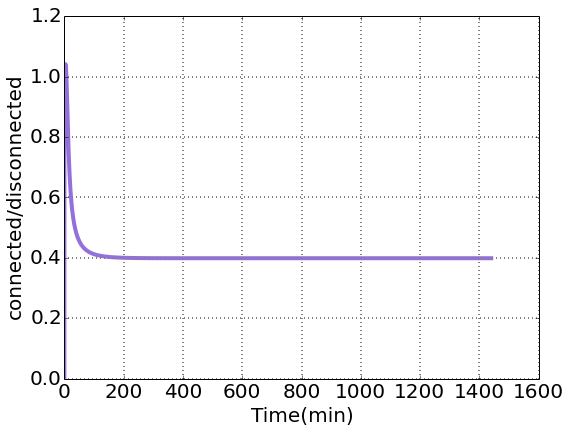

In [39]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=soln5[:,0]/soln4[:,0]
cosa[0]=0
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('one_00_S_50_100kon_deg_ratio.eps',format="eps")
show()

# Con A total

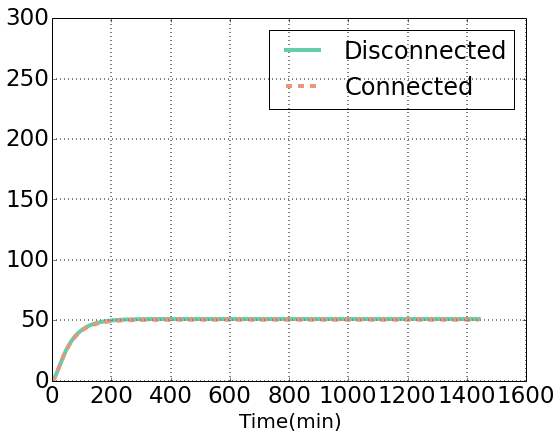

In [40]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60;
k3=0.5;
d4=0.02;
xo = [0, 0, 0, 0]; 
t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon;
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_deg.eps',format="eps")
show()

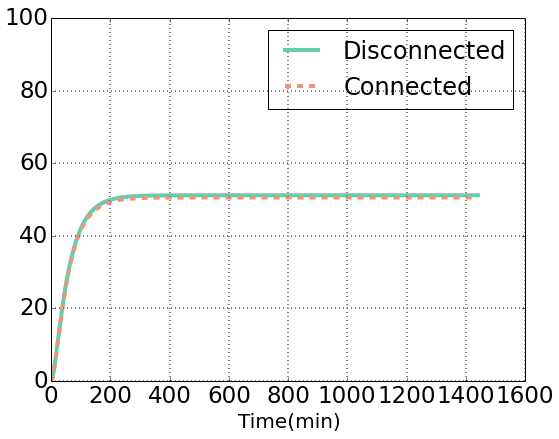

In [41]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60;
k3=0.5;
d4=0.02;
xo = [0, 0, 0, 0]; 
t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon;
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_deg_100_scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


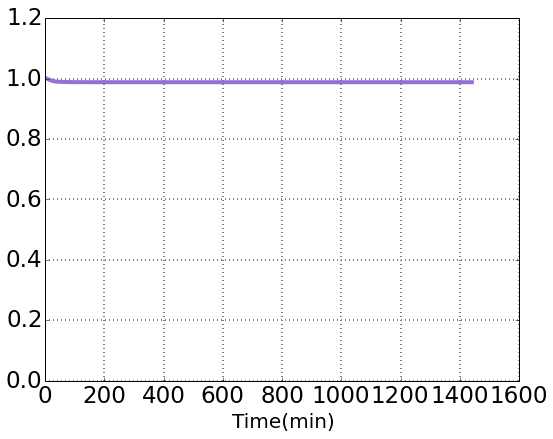

In [42]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
a1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_00_S_50_deg_ratio.eps',format="eps")
show()

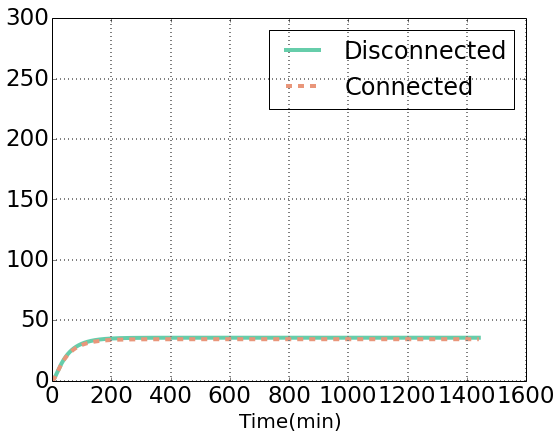

In [43]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60;
k3=0.5;
d4=0.02;
xo = [0, 0, 0, 0]; 
t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon;
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Monomer_A_one_S_50_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


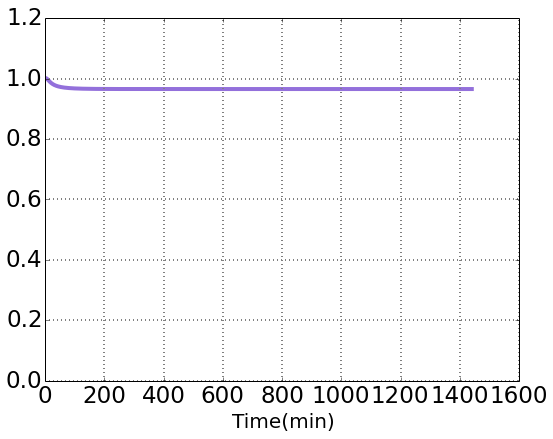

In [44]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0])/(soln4[:,0])
a1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Monomer_A_one_00_S_50_deg_ratio.eps',format="eps")
show()

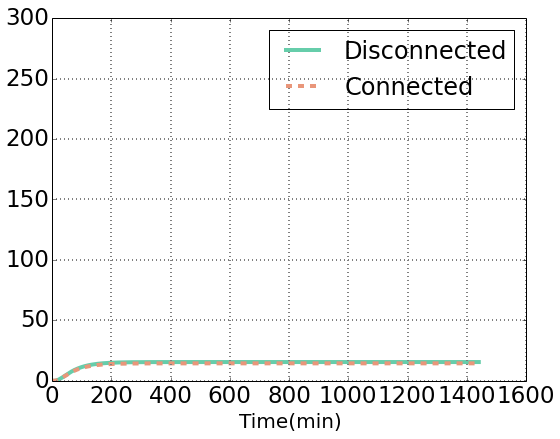

In [45]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_deg.eps',format="eps")
show()

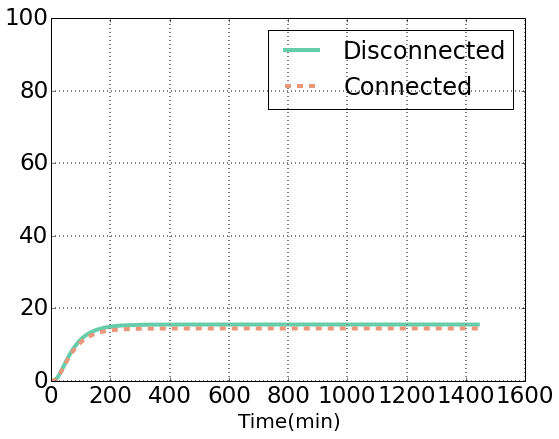

In [46]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_deg_100_scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


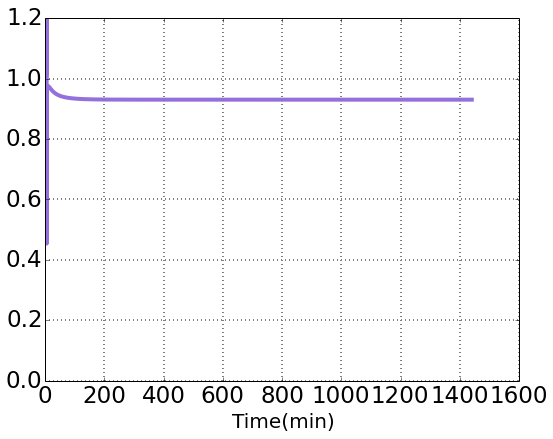

In [47]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2])/(soln4[:,2])
c1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_00_S_50_deg_ratio_NORMAL_a_uno.eps',format="eps")
show()

# Con A total y 100kon

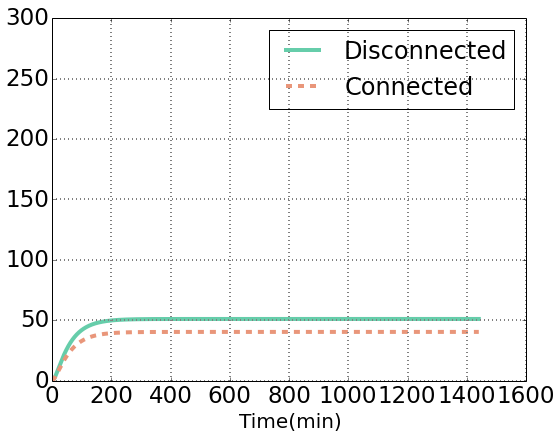

In [48]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=0.02
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=100*kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_100kon_deg.eps',format="eps")
show()

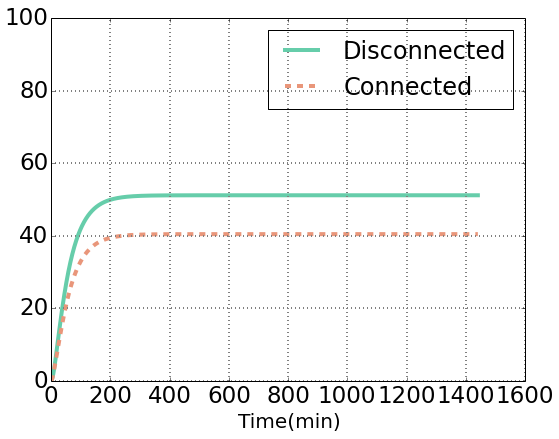

In [49]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=0.02
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=100*kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_100kon_deg_100_scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


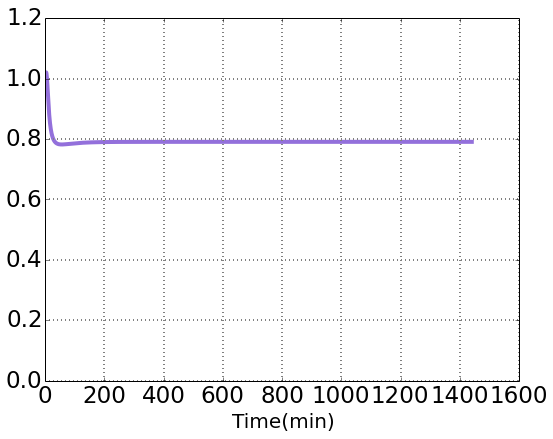

In [50]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
b1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_S_50_deg_ratio_NORMAL_100kon.eps',format="eps")
show()

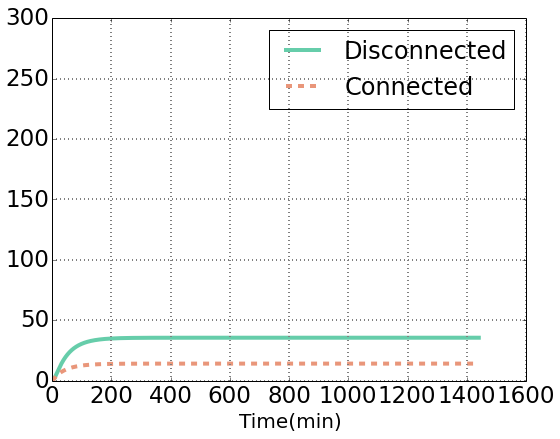

In [51]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=0.02
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=100*kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Monomer_A_one_S_50_100kon_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


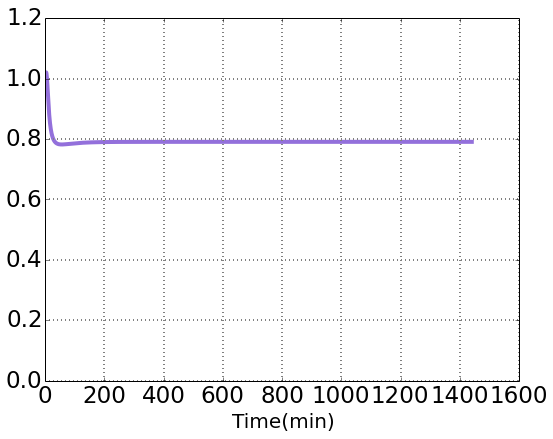

In [52]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa2=(soln5[:,0]/soln4[:,0])
b1=cosa2
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Monomer_A_one_S_50_deg_ratio_NORMAL_100kon.eps',format="eps")
show()

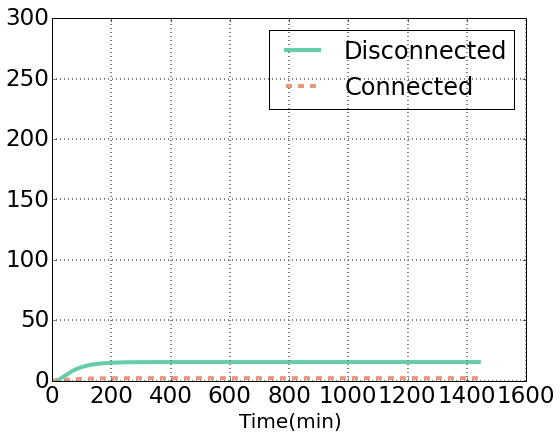

In [53]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_100kon_deg_NORMAL.eps',format="eps")
show()

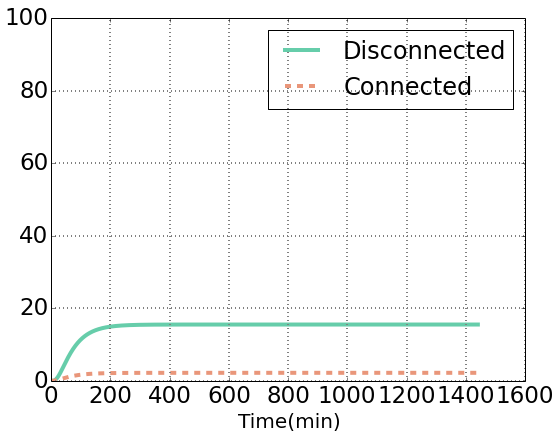

In [54]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_100kon_deg_NORMAL_100scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


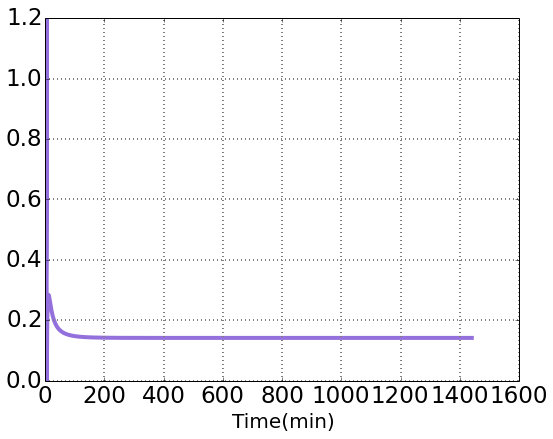

In [55]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2])/(soln4[:,2])
l1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_S_50_deg_ratio_NORMAL_100KON.eps',format="eps")
show()

# Con A total y koff/100

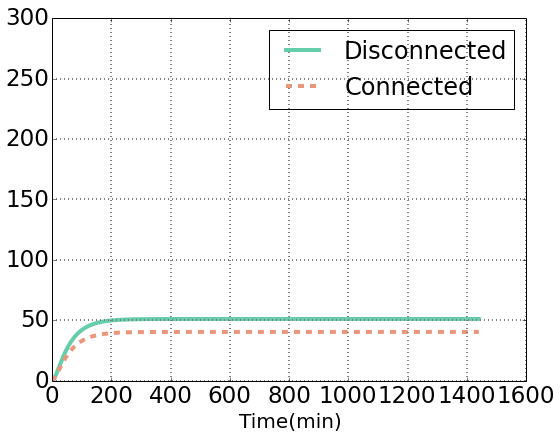

In [56]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60/100
d=0.02
d2=0.06
d3=0.02
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_entre100koff_deg.eps',format="eps")
show()

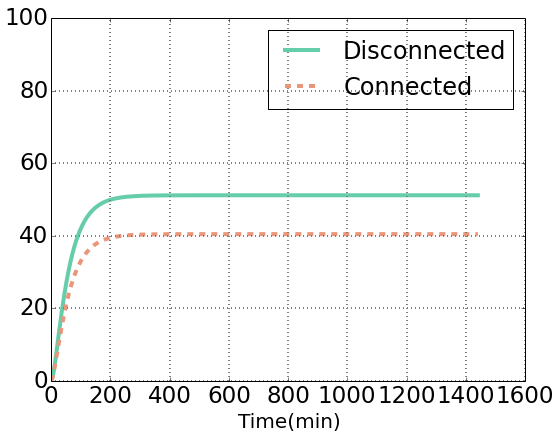

In [57]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60/100
d=0.02
d2=0.06
d3=0.02
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_entre100koff_deg_100_scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


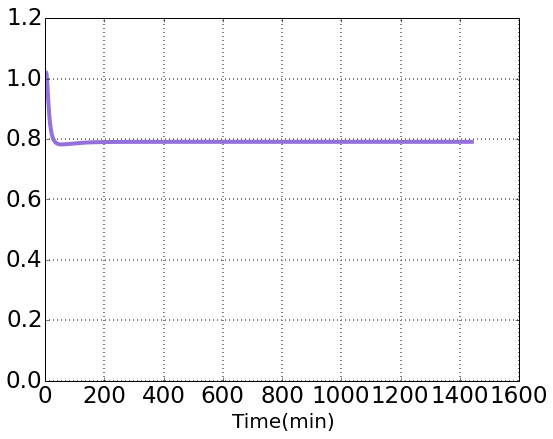

In [58]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
b1_1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_S_50_deg_ratio_NORMAL_entre100koff.eps',format="eps")
show()

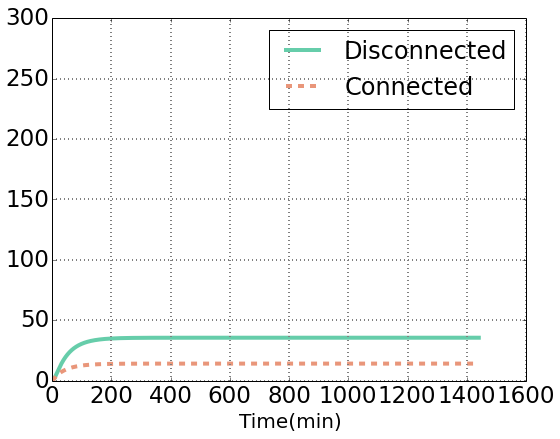

In [59]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60/100
d=0.02
d2=0.06
d3=0.02
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Monomer_A_one_S_50_entre100koff_deg.eps',format="eps")
show()

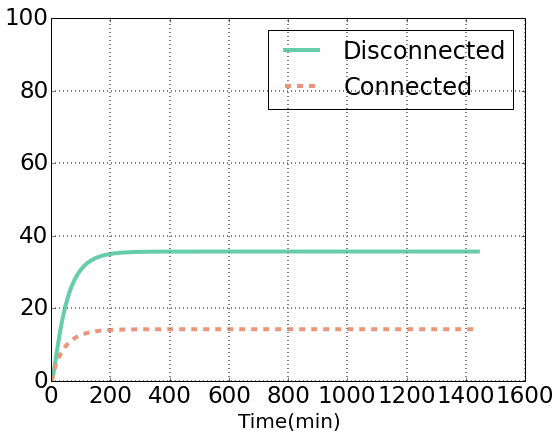

In [60]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60/100
d=0.02
d2=0.06
d3=0.02
d4=0.02; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Monomer_A_one_S_50_entre100koff_deg_100.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


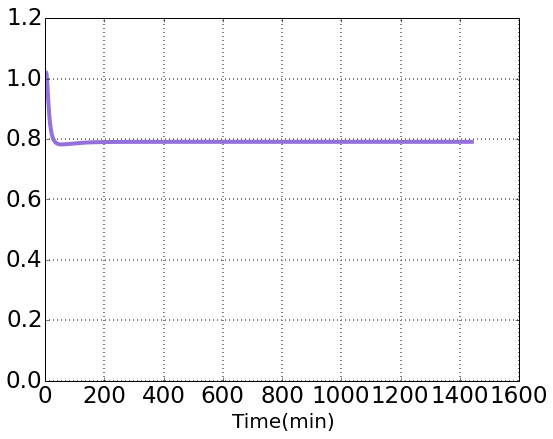

In [61]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa2=(soln5[:,0]/soln4[:,0])
l1_1=cosa2
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Monomer_A_one_S_50_deg_ratio_NORMAL_entre100koff.eps',format="eps")
show()

# A total y Deg de complejo 0

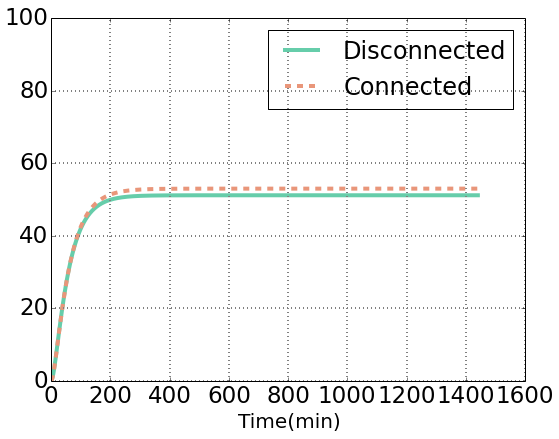

In [62]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=0.02
d4=0.0; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_deg_0_scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


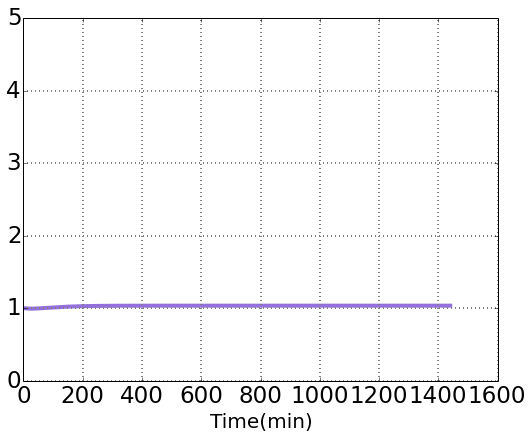

In [63]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
a2=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_S_50_0_deg_ratio.eps',format="eps")
show()

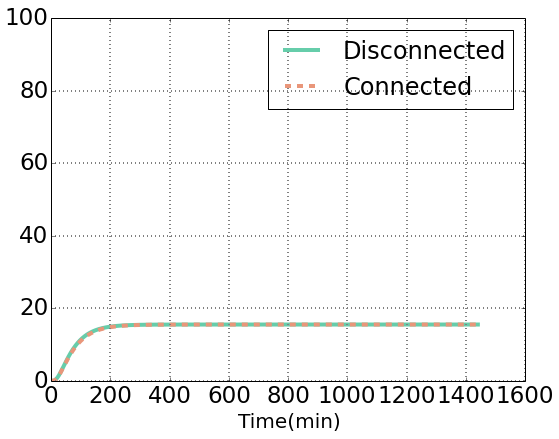

In [64]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_deg_0_scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


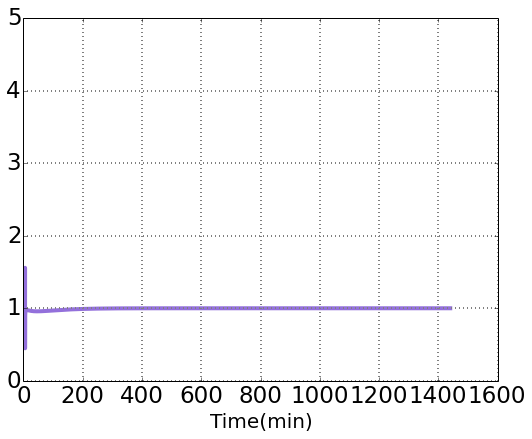

In [65]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2])/(+soln4[:,2])
c2=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_S_50_0_deg_ratio.eps',format="eps")
show()

## A Total Deg de complejo 0 100 kon

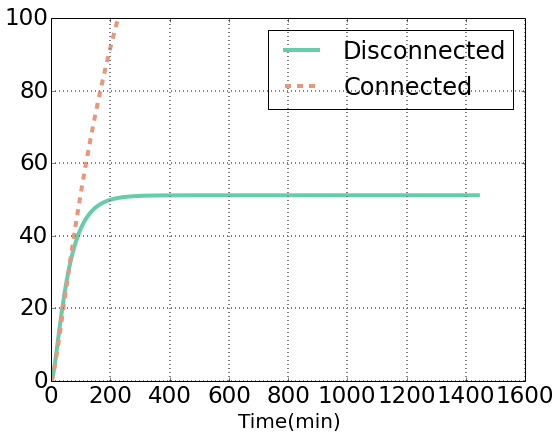

In [66]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=0.02
d4=0.0; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=100*kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_deg_0_scale_100_kon.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


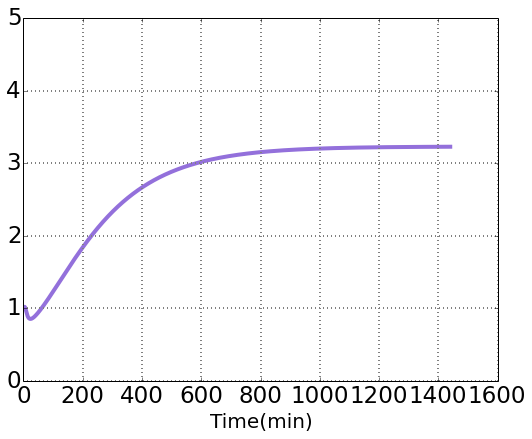

In [67]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
b2=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_S_50_0_deg_ratio_100_kon.eps',format="eps")
show()

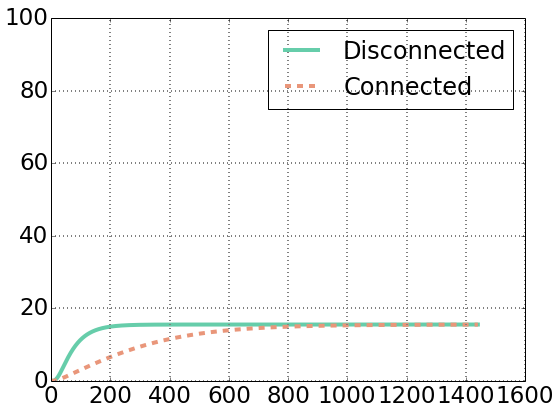

In [68]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

#xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_deg_0_scale_100_kon.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


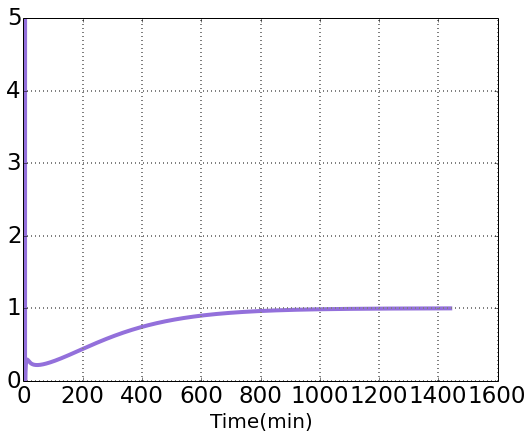

In [69]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2])/(soln4[:,2])
l2=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_S_50_0_deg_ratio_100_kon.eps',format="eps")
show()

## A Total Deg de complejo 0 koff/100

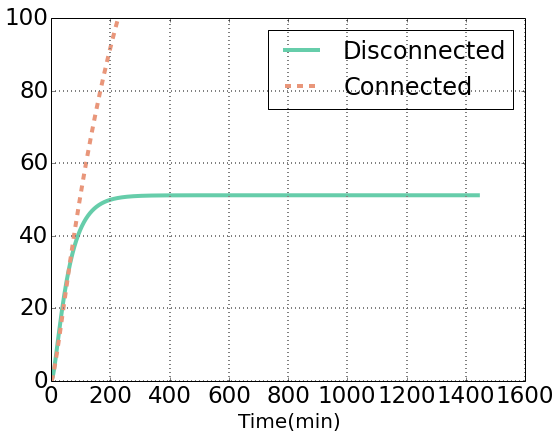

In [70]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60/100
d=0.02
d2=0.06
d3=0.02
d4=0.0; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_deg_0_scale_entre_100_koff.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


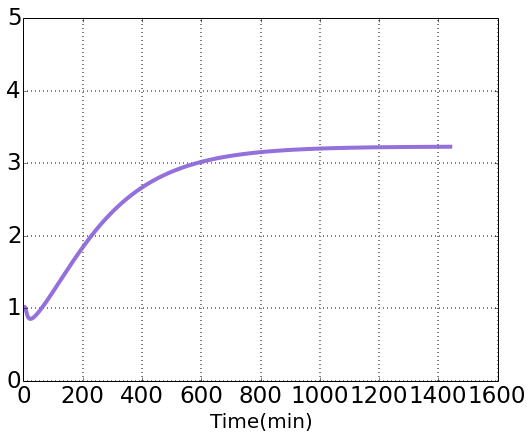

In [71]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
b2_1=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_S_50_0_deg_ratio_entre_100_koff.eps',format="eps")
show()

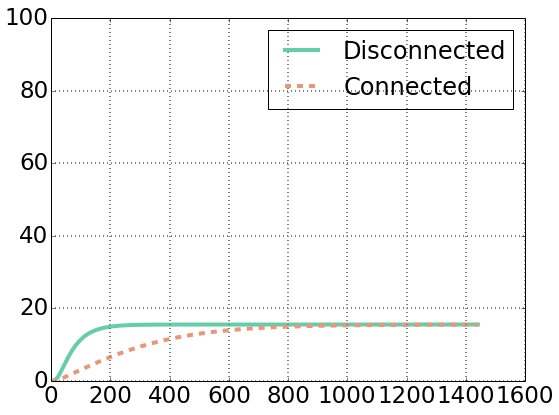

In [72]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

#xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_deg_0_scale_entre_100_koff.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


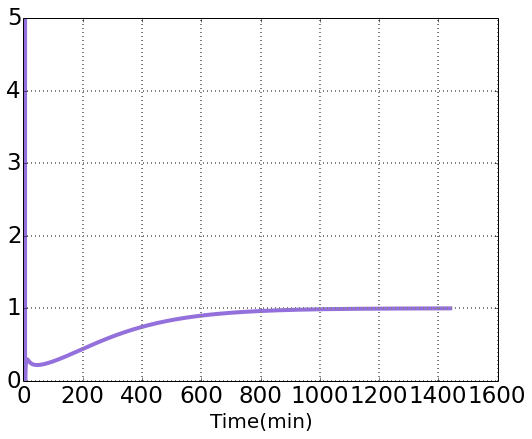

In [73]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2])/(soln4[:,2])
l2_1=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_S_50_0_deg_ratio_entre_100_koff.eps',format="eps")
show()

## A total deg de complejo 0.5 

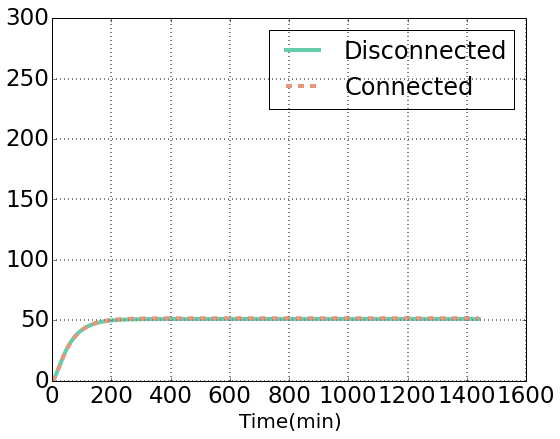

In [74]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=d;
d4=0.5*d; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_05_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


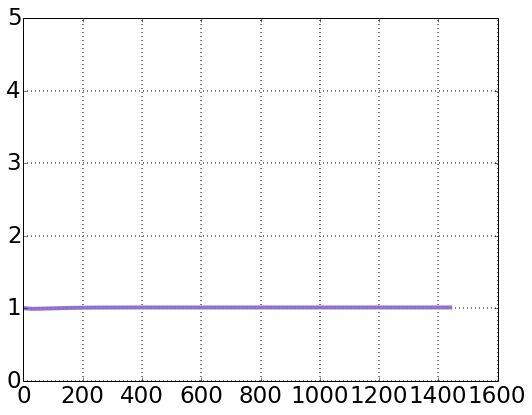

In [75]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
a3=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
#xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_00_S_50_05_deg_ratio.eps',format="eps")
show()

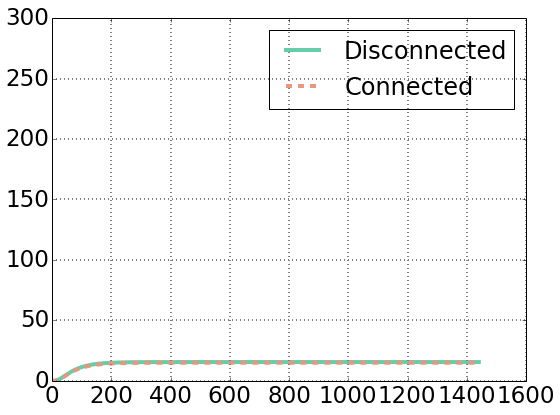

In [76]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

#xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_05_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


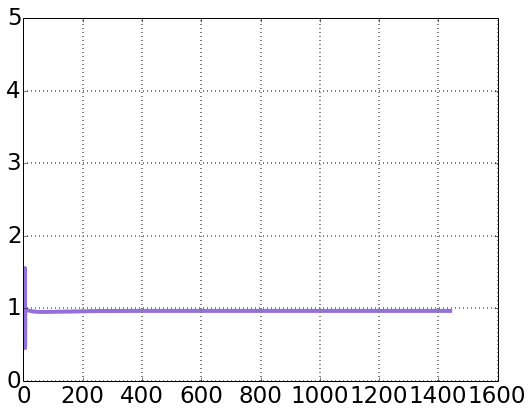

In [77]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2]/soln4[:,2])
c3=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
#xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_00_S_50_05_deg_ratio.eps',format="eps")
show()

## A total deg de complejo 0.5 100kon

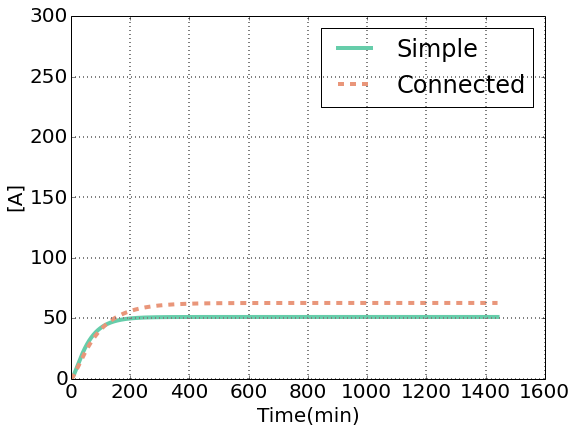

In [78]:
import numpy
ptot2=300
S=50
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=d;
d4=0.5*d; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d2*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_05_deg_100kon.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


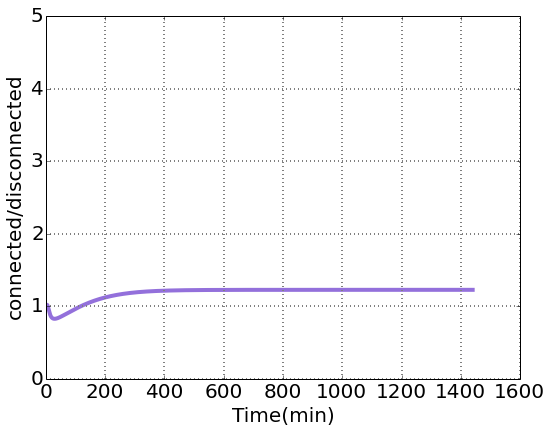

In [79]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
b3=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_00_S_50_05_deg_ratio_100_kon.eps',format="eps")
show()

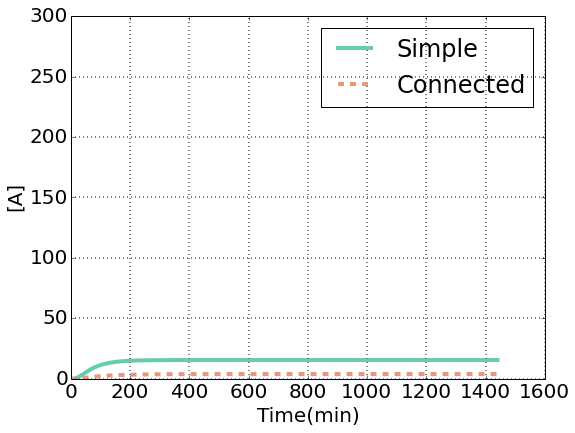

In [80]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_05_deg_100kon.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


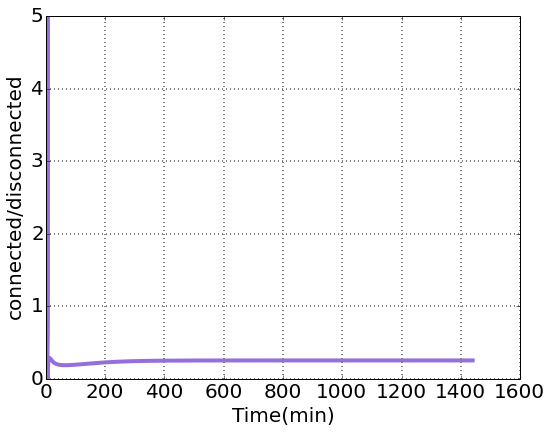

In [81]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2]/soln4[:,2])
l3=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_00_S_50_05_deg_ratio_100kon.eps',format="eps")
show()

## A total deg de complejo 0.5 100_koff

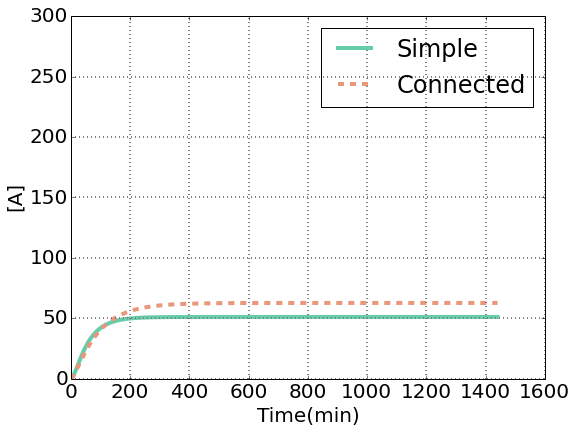

In [82]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60/100
d=0.02
d2=0.06
d3=d;
d4=0.5*d; 
xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_05_deg_entre100koff.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


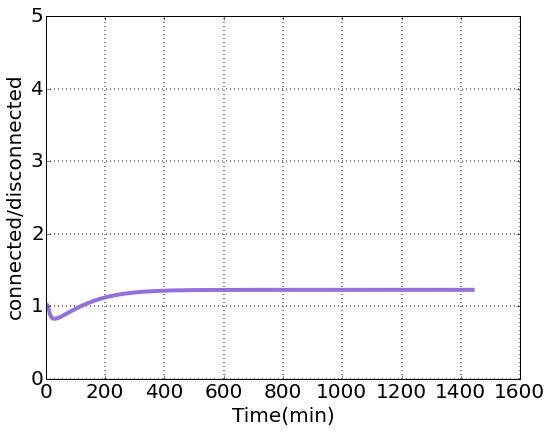

In [83]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
b3_1=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_00_S_50_05_deg_ratio_entre_100_koff.eps',format="eps")
show()

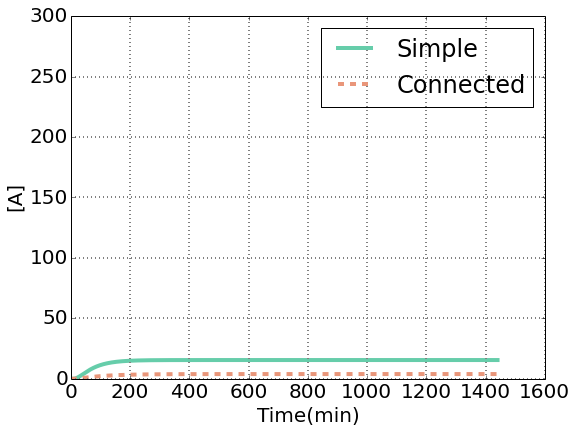

In [84]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_05_deg_entre100koff.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


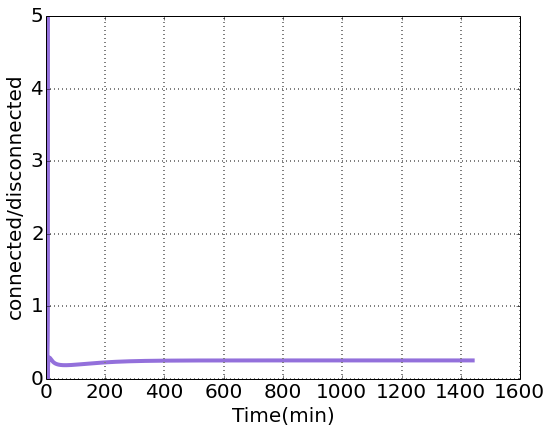

In [85]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2]/soln4[:,2])
l3_1=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_00_S_50_05_deg_ratio_entre100koff.eps',format="eps")
show()

# A total deg de complejo 0.25 

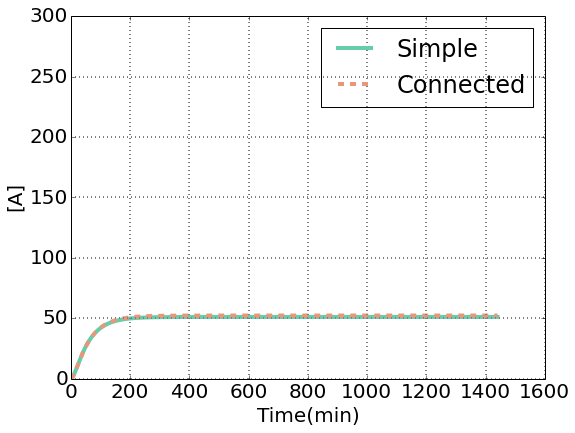

In [86]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=d;
d4=0.25*d; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d4*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_025_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


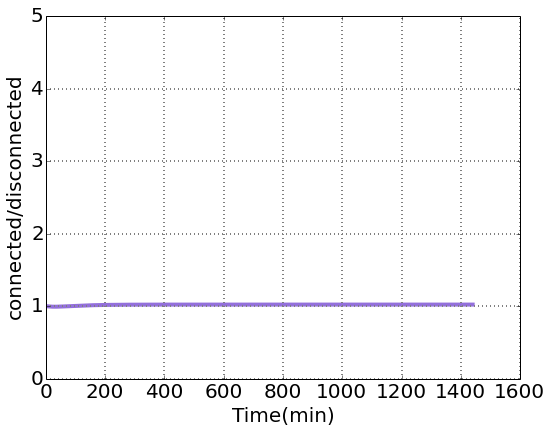

In [87]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
a4=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_00_S_50_025_deg_ratio.eps',format="eps")
show()

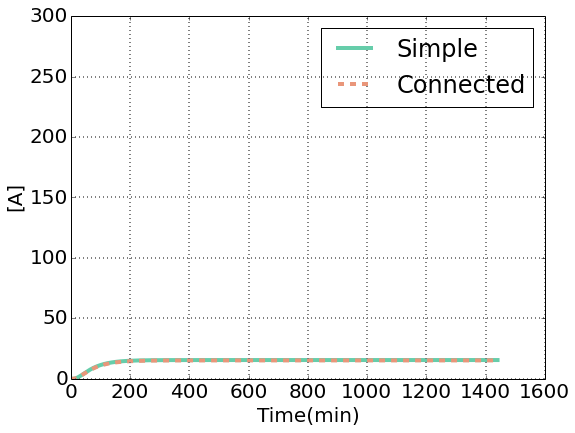

In [88]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_025_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


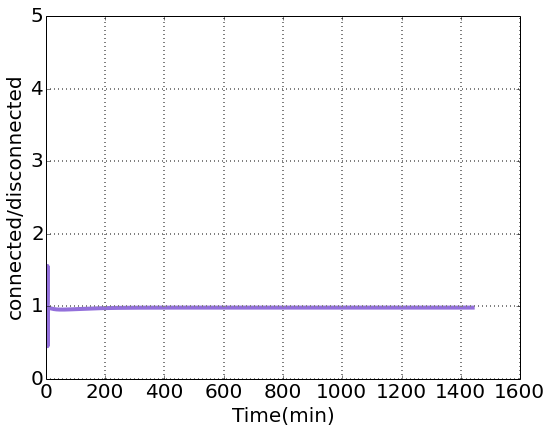

In [89]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2]/soln4[:,2])
c4=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_00_S_50_025_deg_ratio.eps',format="eps")
show()

# Total A deg 0.25 100 kon

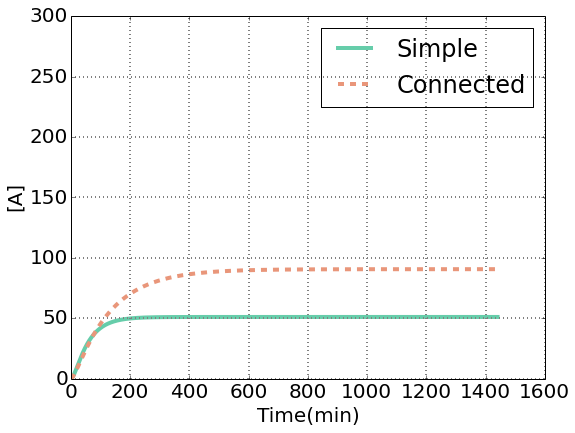

In [90]:
import numpy
ptot2=300
S=50
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=d;
d4=0.25*d; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d2*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_025_deg_100kon.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


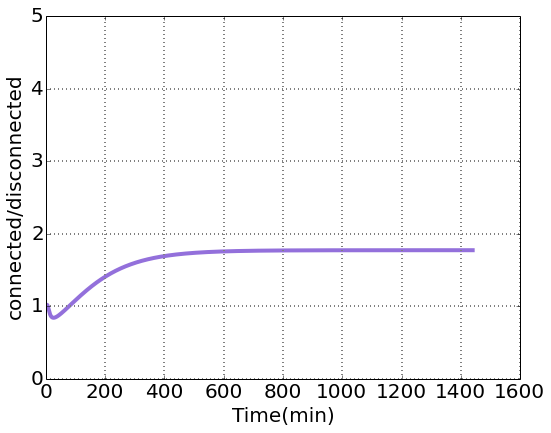

In [91]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
b4=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_00_S_50_025_deg_ratio_100_kon.eps',format="eps")
show()

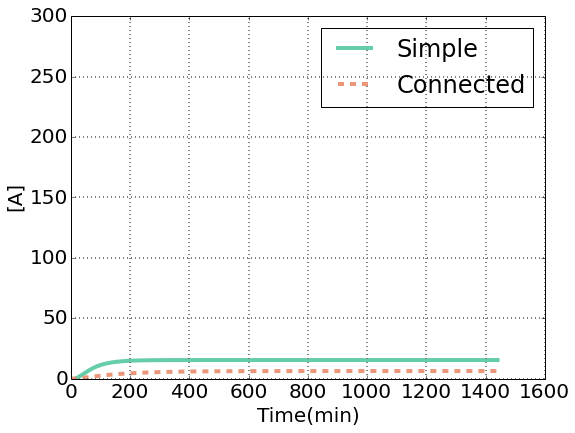

In [92]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_025_deg_100kon.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


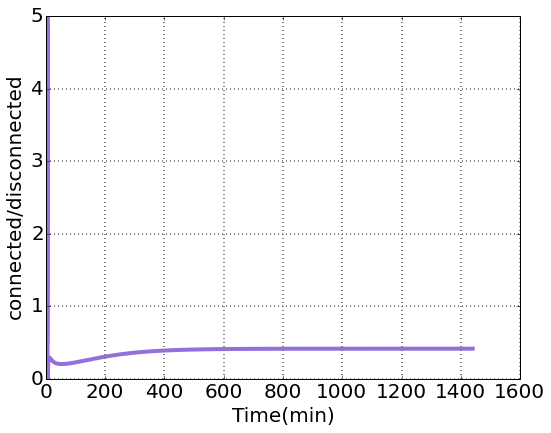

In [93]:
cosa=(soln5[:,2])/(soln4[:,2])
l4=cosa
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_00_S_50_025_deg_ratio_100_kon.eps',format="eps")
show()

# Total A deg 0.25 koff/100

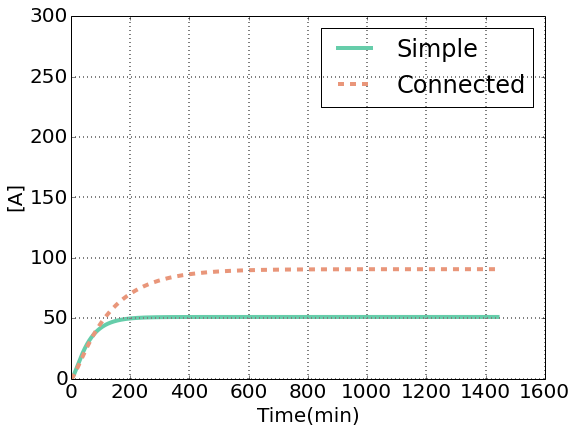

In [94]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60/100
d=0.02
d2=0.06
d3=d;
d4=0.25*d; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d2*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_025_deg_entre100koff.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


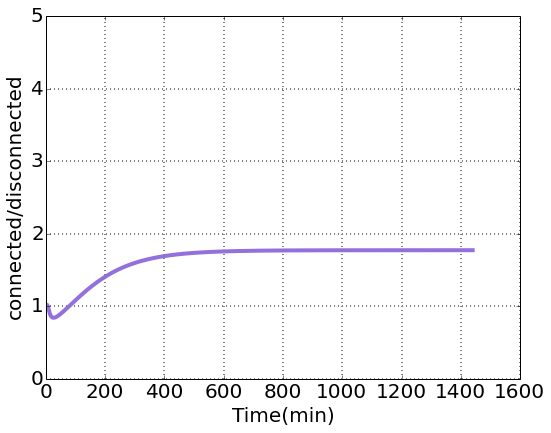

In [95]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
b4_1=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_00_S_50_025_deg_ratio_entre_100_koff.eps',format="eps")
show()

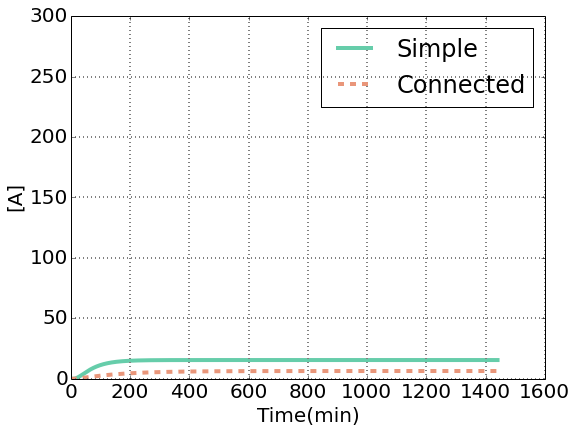

In [96]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_025_deg_entre100koff.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


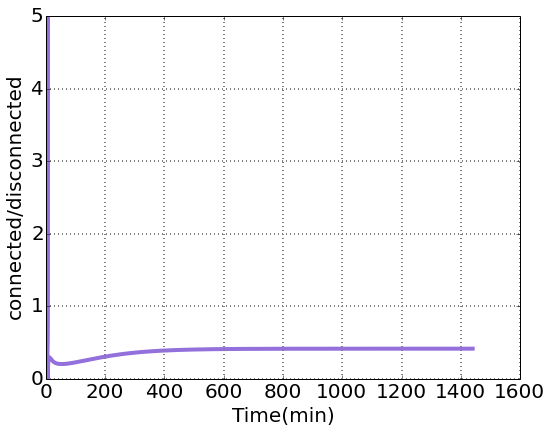

In [97]:
cosa=(soln5[:,2])/(soln4[:,2])
l4_1=cosa
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_00_S_50_025_deg_ratio_entre_100_koff.eps',format="eps")
show()

# A total deg de complejo 2

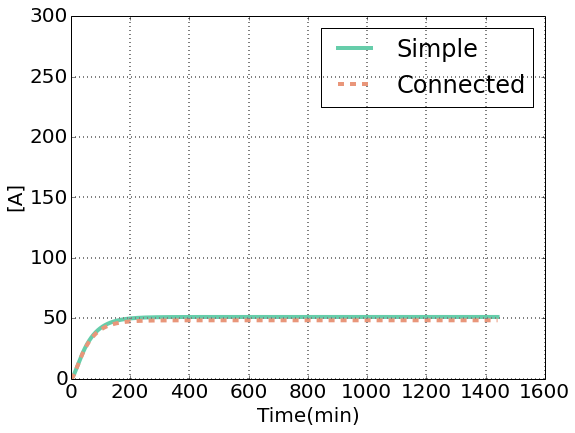

In [98]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=d;
d4=2*d; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d2*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_2_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


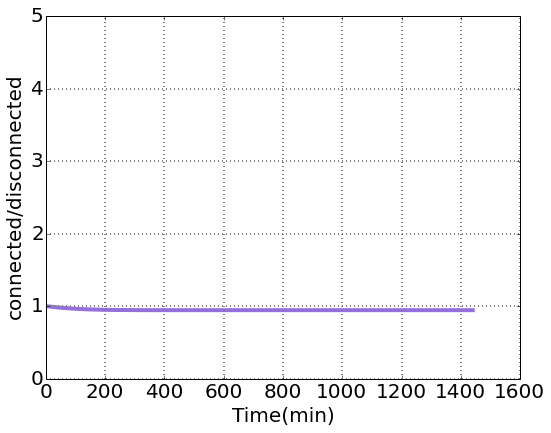

In [99]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
a5=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_00_S_50_2_deg_ratio.eps',format="eps")
show()

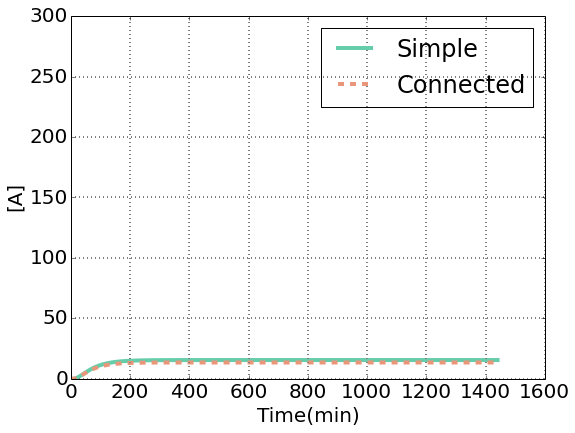

In [100]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_2_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


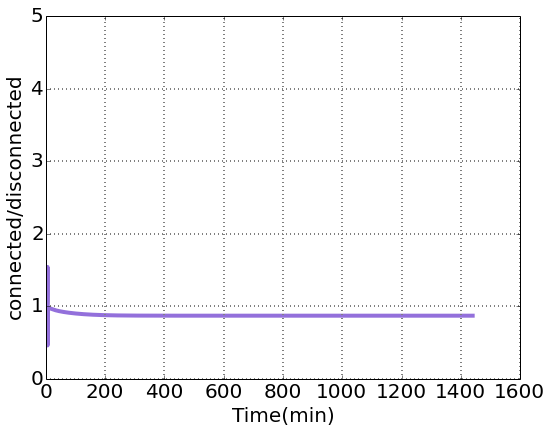

In [101]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2]/soln4[:,2])
c5=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_00_S_50_2_deg_ratio.eps',format="eps")
show()

# A total deg de complejo 2 100 kon

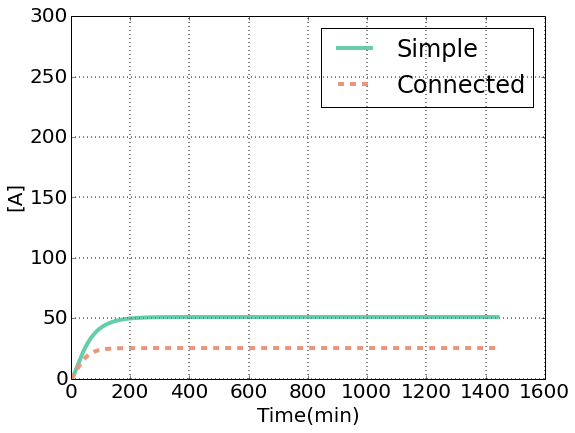

In [102]:
import numpy
ptot2=300
S=50
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60
d=0.02
d2=0.06
d3=d;
d4=2*d; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d2*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_2_deg_100kon.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


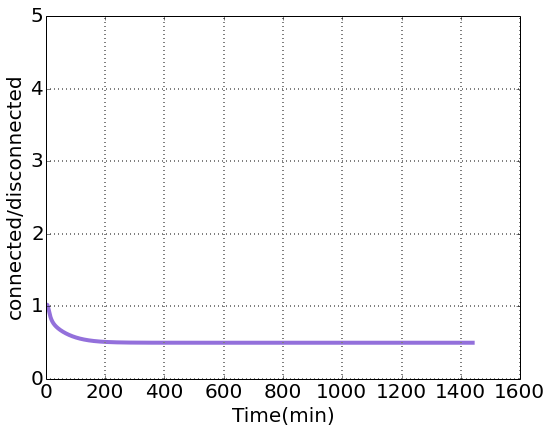

In [103]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
b5=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_00_S_50_2_deg_ratio_100_kon.eps',format="eps")
show()

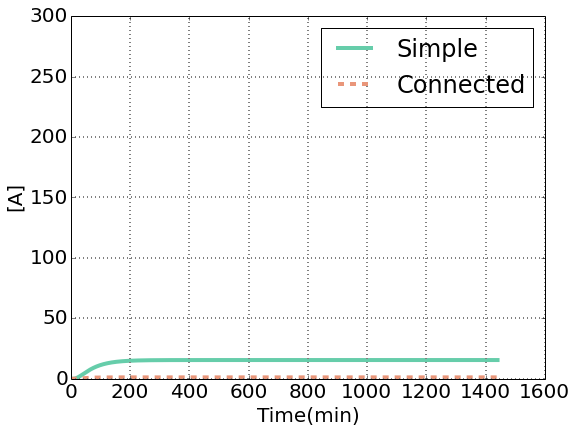

In [104]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_2_deg_100kon.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


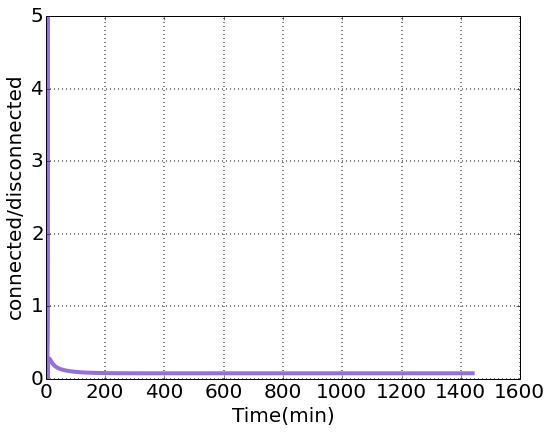

In [105]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2]/soln4[:,2])
l5=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_00_S_50_2_deg_ratio_100_kon.eps',format="eps")
show()

# A total deg de complejo 2 koff/100

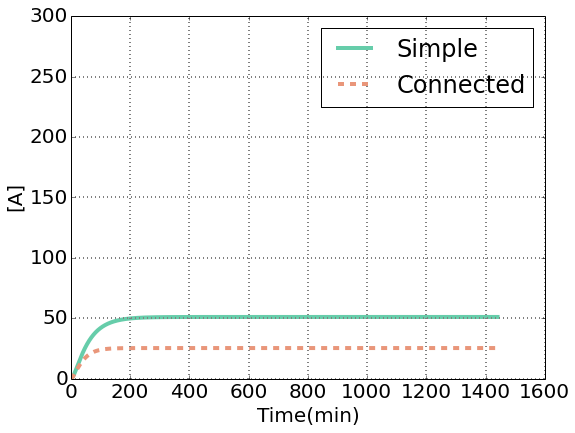

In [106]:
import numpy
ptot2=300
S=50
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))
koff=30*60/100
d=0.02
d2=0.06
d3=d;
d4=2*d; xo = [0, 0, 0, 0]; t=np.arange(0,1440,0.1); ptot2=0; ptot3=300; konx=kon
def f4(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot2-x[3])*x[2]*kon-d3*x[2]),
            (-koff*x[3]+(ptot2-x[3])*x[2]*kon)-d2*x[3])
def f4R(x,t): 
    return (((k2*x[1])-2*(kdim*(x[0]*(x[0]-1)))+2*kundim*x[2]-d*x[0]),
            ((a+(k*S)-d2*x[1])),
            (kdim*(x[0]*(x[0]-1))-kundim*x[2]+koff*x[3]-(ptot3-x[3])*x[2]*konx-d3*x[2]),
            (-koff*x[3]+(ptot3-x[3])*x[2]*konx-d4*x[3]))
soln4=odeint(f4,xo,t)
soln5=odeint(f4R,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,0]+soln4[:,2]+soln4[:,3], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,0]+soln5[:,2]+soln5[:,3], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_one_S_50_2_deg_entr100koff.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


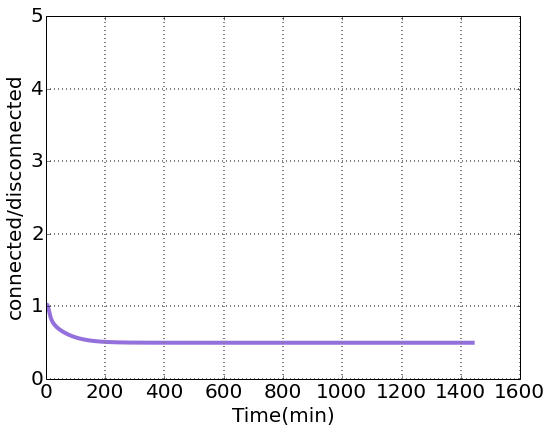

In [107]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,0]+soln5[:,2]+soln5[:,3])/(soln4[:,0]+soln4[:,2]+soln4[:,3])
b5_1=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_one_00_S_50_2_deg_ratio_entre_100_koff.eps',format="eps")
show()

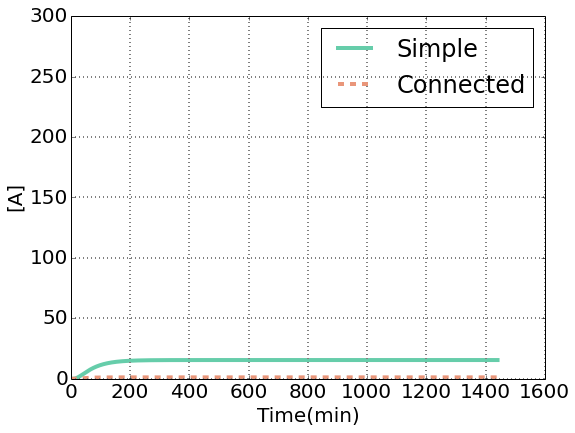

In [108]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln4[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,soln5[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Dim_A_one_S_50_2_deg_entre100koff.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


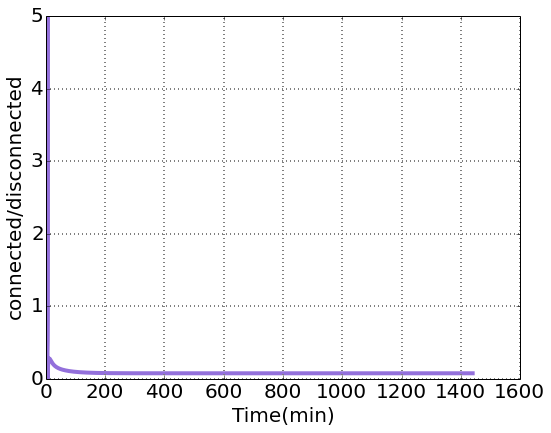

In [109]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln5[:,2]/soln4[:,2])
l5_1=cosa
pylab.ylim([0,5])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Dim_A_one_00_S_50_2_deg_ratio_entre_100_koff.eps',format="eps")
show()

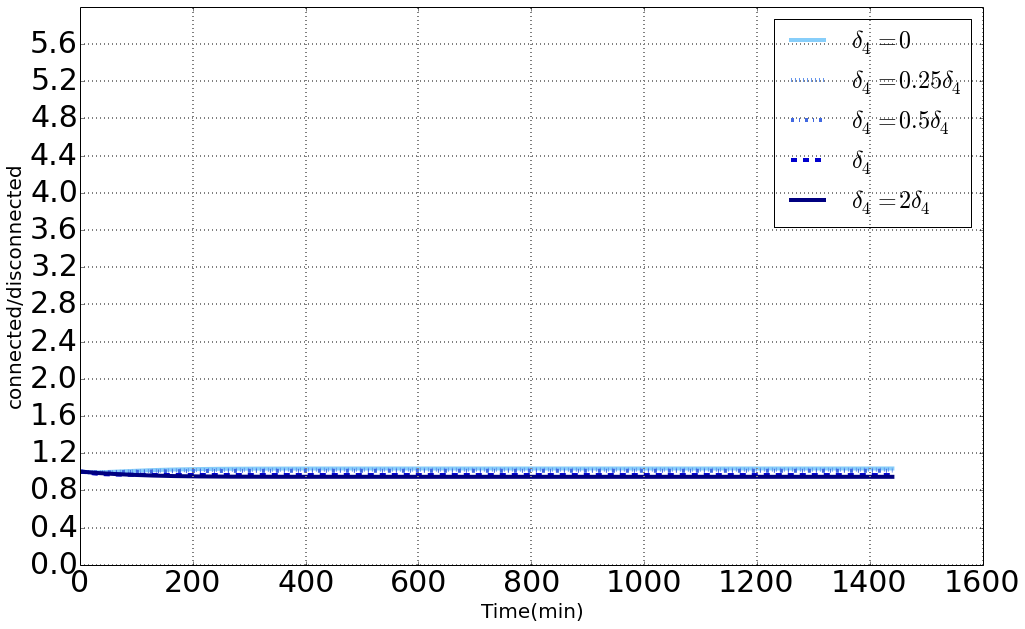

In [110]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=4)
line2, =plot(t,a4, ":", color = '#6495ed',lw=4)
line3, =plot(t,a3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,a1, "--", color = '#0000cd',lw=4)
line5, =plot(t,a5, color = '#000080',lw=4)

#line1, =ax.semilogy(t,a2,color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, ":", color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, "-.", color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, "--", color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0.0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_kon_case_two.eps',format="eps")
show()

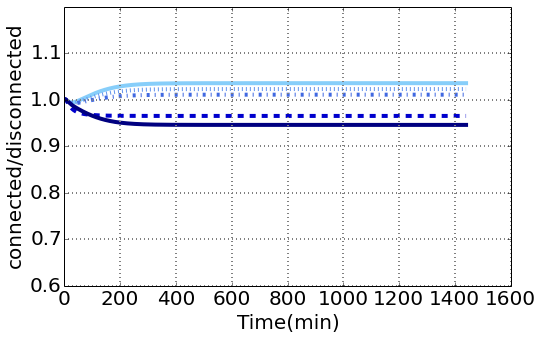

In [111]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=4)
line2, =plot(t,a4, ":", color = '#6495ed',lw=4)
line3, =plot(t,a3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,a1, "--", color = '#0000cd',lw=4)
line5, =plot(t,a5, color = '#000080',lw=4)

#line1, =ax.semilogy(t,a2,color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, ":", color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, "-.", color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, "--", color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0.6,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_Mini_A_ratios_kon_case_two.eps',format="eps")
show()

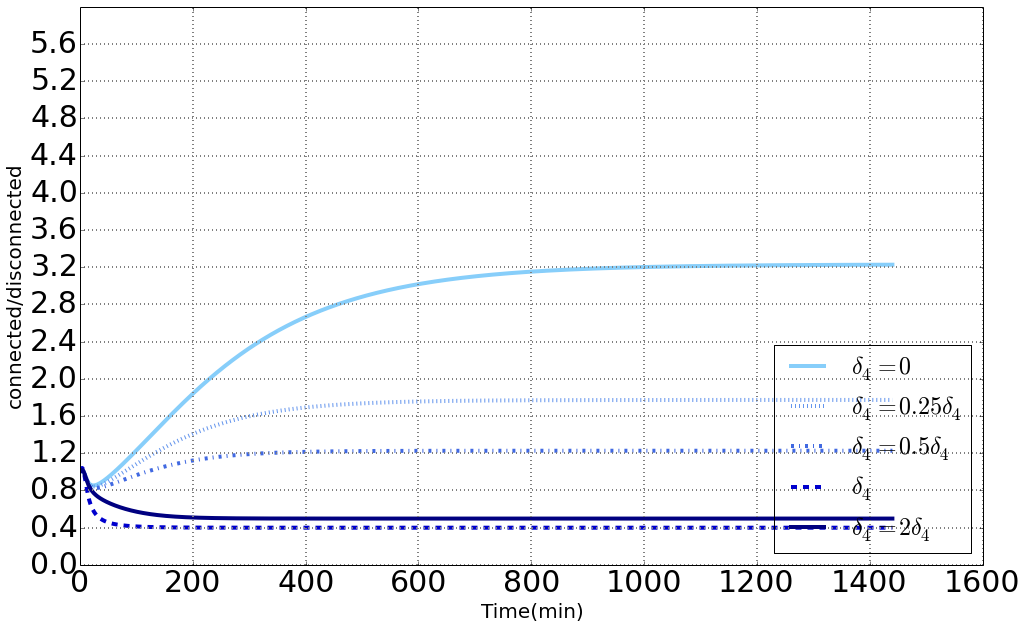

In [112]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

line1, =plot(t,b2,color = '#87cefa', lw=4)
line2, =plot(t,b4, ":", color = '#6495ed',lw=4)
line3, =plot(t,b3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,b1, "--", color = '#0000cd',lw=4)
line5, =plot(t,b5, color = '#000080',lw=4)

#line1, =ax.semilogy(t,b2,color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,b4, ":", color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,b3, "-.", color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,b1, "--", color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,b5, color = '#000080',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_100kon_case_two.eps',format="eps")
show()

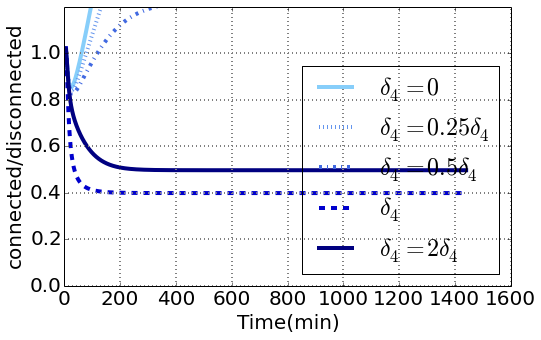

In [113]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

line1, =plot(t,b2,color = '#87cefa', lw=4)
line2, =plot(t,b4, ":", color = '#6495ed',lw=4)
line3, =plot(t,b3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,b1, "--", color = '#0000cd',lw=4)
line5, =plot(t,b5, color = '#000080',lw=4)

#line1, =ax.semilogy(t,b2,color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,b4, ":", color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,b3, "-.", color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,b1, "--", color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,b5, color = '#000080',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_Mini_ratios_100kon_case_two.eps',format="eps")
show()

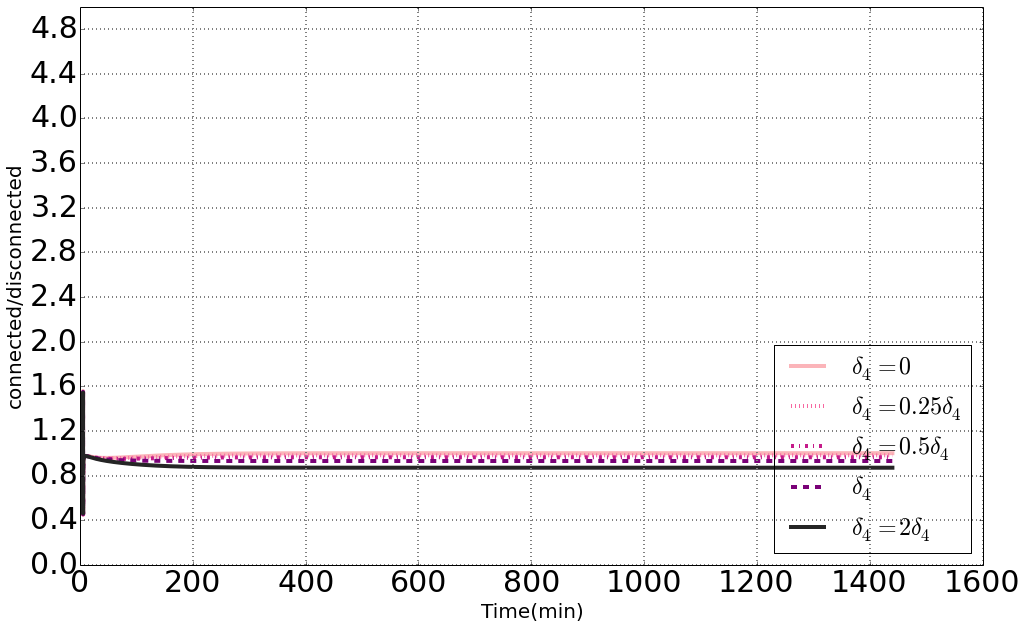

In [114]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,c2,color = '#FBB4B9', lw=4)
line2, =plot(t,c4, ":", color = '#F768A1',lw=4)
line3, =plot(t,c3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,c1, "--", color = '#7A0177',lw=4)
line5, =plot(t,c5, color = '#252525',lw=4)

#line1, =ax.semilogy(t,c2,color = '#FBB4B9', lw=4)
#line2, =ax.semilogy(t,c4, ":", color = '#F768A1',lw=4)
#line3, =ax.semilogy(t,c3, "-.", color = '#C51B8A', lw=4)
#line4, =ax.semilogy(t,c1, "--", color = '#7A0177',lw=4)
#line5, =ax.semilogy(t,c5, color = '#252525',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Free_A_ratios_case_two.eps',format="eps")
show()

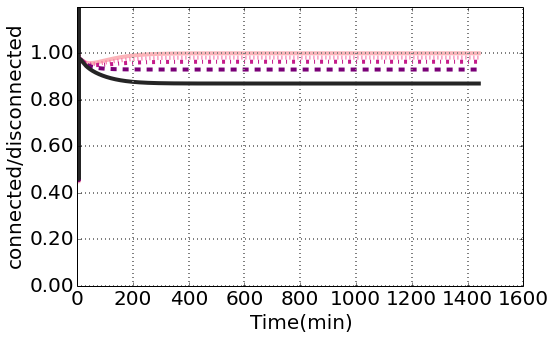

In [115]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,c2,color = '#FBB4B9', lw=4)
line2, =plot(t,c4, ":", color = '#F768A1',lw=4)
line3, =plot(t,c3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,c1, "--", color = '#7A0177',lw=4)
line5, =plot(t,c5, color = '#252525',lw=4)

#line1, =ax.semilogy(t,c2,color = '#FBB4B9', lw=4)
#line2, =ax.semilogy(t,c4, ":", color = '#F768A1',lw=4)
#line3, =ax.semilogy(t,c3, "-.", color = '#C51B8A', lw=4)
#line4, =ax.semilogy(t,c1, "--", color = '#7A0177',lw=4)
#line5, =ax.semilogy(t,c5, color = '#252525',lw=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

fig.savefig('Free_A_Mini_ratios_case_two.eps',format="eps")
show()

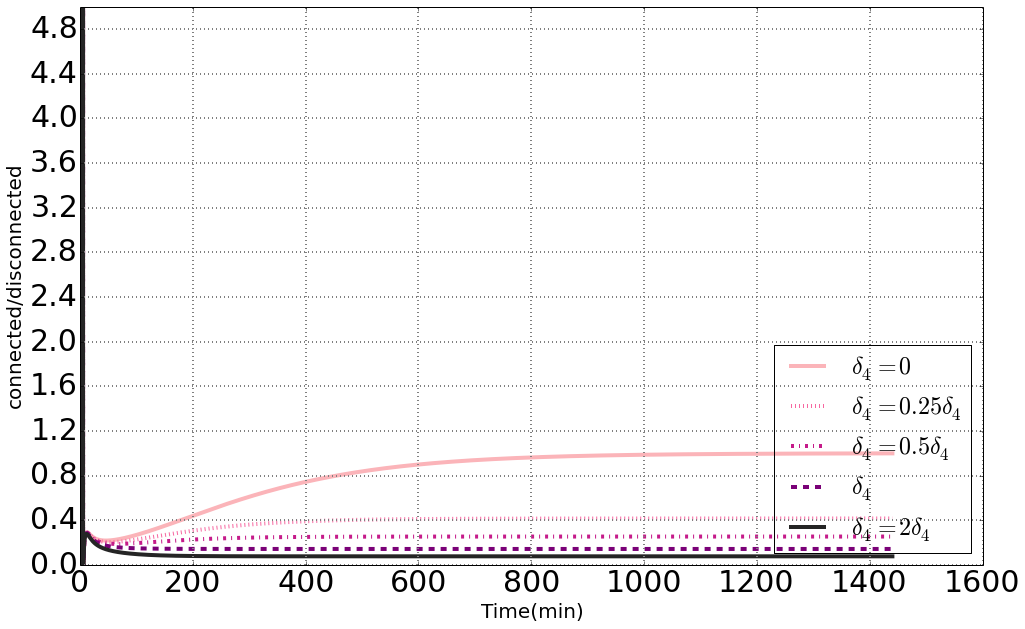

In [116]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,l2,color = '#FBB4B9', lw=4)
line2, =plot(t,l4, ":", color = '#F768A1',lw=4)
line3, =plot(t,l3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,l1, "--", color = '#7A0177',lw=4)
line5, =plot(t,l5, color = '#252525',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Free_A_ratios_100kon_case_two.eps',format="eps")
show()

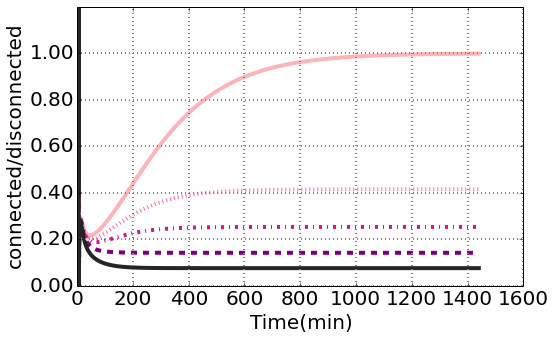

In [117]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,l2,color = '#FBB4B9', lw=4)
line2, =plot(t,l4, ":", color = '#F768A1',lw=4)
line3, =plot(t,l3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,l1, "--", color = '#7A0177',lw=4)
line5, =plot(t,l5, color = '#252525',lw=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

fig.savefig('Free_A_Mini_ratios_100kon_case_two.eps',format="eps")
show()

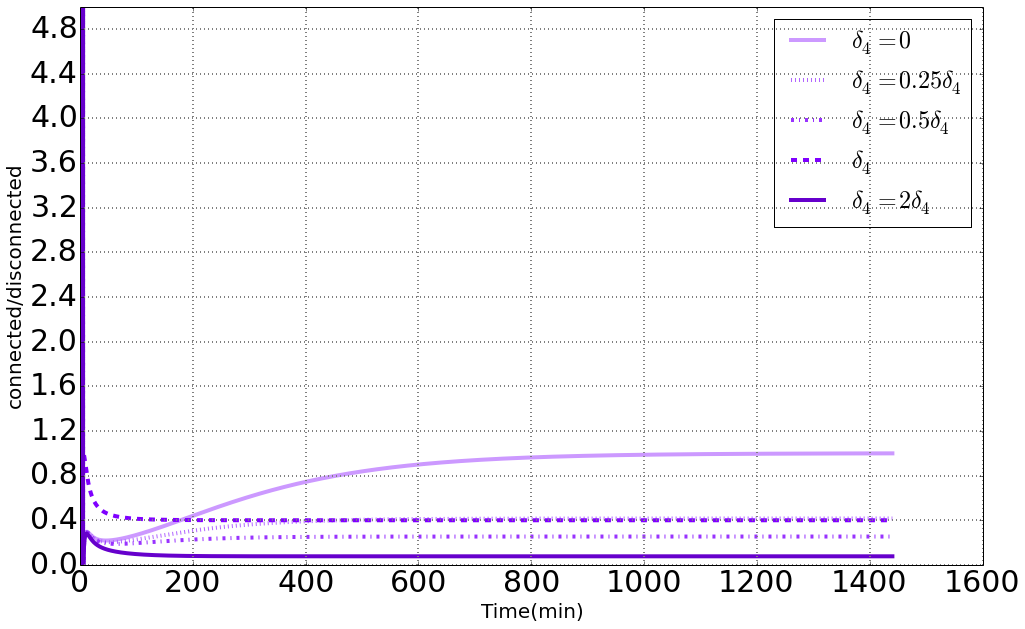

In [118]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)


line1, =plot(t,l2_1,color = '#CC99FF', lw=4)
line2, =plot(t,l4_1, ":", color = '#B266FF',lw=4)
line3, =plot(t,l3_1, "-.", color = '#9933FF', lw=4)
line4, =plot(t,l1_1, "--", color = '#7F00FF',lw=4)
line5, =plot(t,l5_1, color = '#6600CC',lw=4)


legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

#fig.savefig('Free_A_ratios_koff_entre_1000_case_one.eps',format="eps")
show()

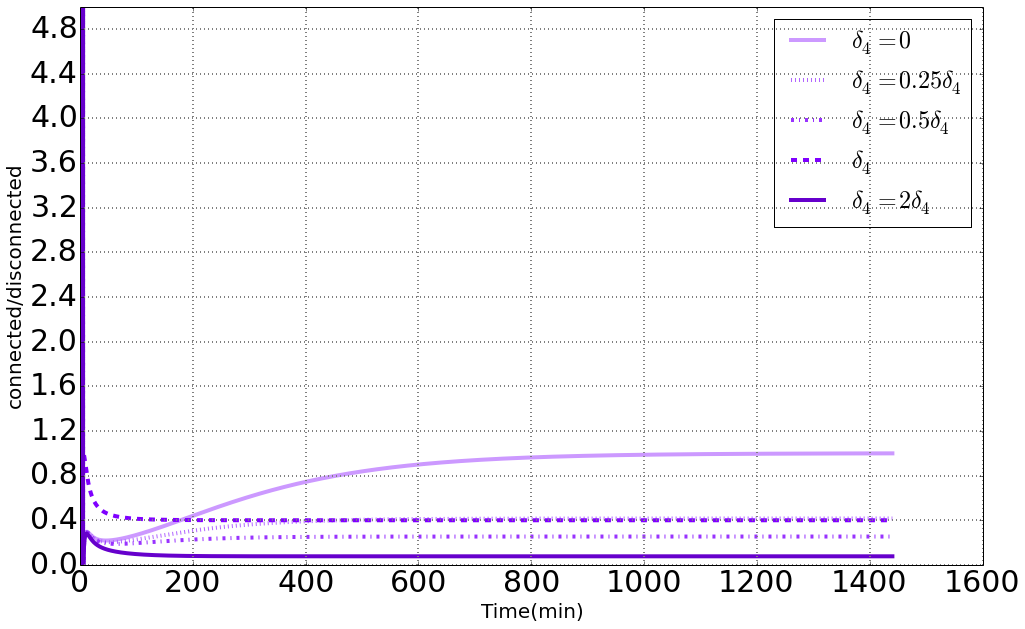

In [119]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)


line1, =plot(t,l2_1,color = '#CC99FF', lw=4)
line2, =plot(t,l4_1, ":", color = '#B266FF',lw=4)
line3, =plot(t,l3_1, "-.", color = '#9933FF', lw=4)
line4, =plot(t,l1_1, "--", color = '#7F00FF',lw=4)
line5, =plot(t,l5_1, color = '#6600CC',lw=4)


legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

#fig.savefig('Free_A_ratios_koff_entre_1000_case_one.eps',format="eps")
show()